<a href="https://colab.research.google.com/github/MarioHernaiz/TFM-UCM/blob/main/Mario_Hernaiz_Sanchez_TFM_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Para pasar a .html, quizás sea necesario borrar los widgets. Ejecutar las dos celdas.

In [ ]:
#!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace /content/Mario_Hernaiz_Sanchez_TFM_Alzheimer.ipynb

In [ ]:
#%%shell
#!jupyter nbconvert --to html /content/Mario_Hernaiz_Sanchez_TFM_Alzheimer.ipynb

# Explicación proyecto

##Créditos por el uso de los datos

@misc{rabie_el_kharoua_2024,
title={Alzheimer's Disease Dataset},
url={https://www.kaggle.com/dsv/8668279},
DOI={10.34740/KAGGLE/DSV/8668279},
publisher={Kaggle},
author={Rabie El Kharoua},
year={2024}
}

## Imports

Previo al lanzamiento del código es necesario saber que si al ejecutar la celda que contiene:
```
# from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model
```
da error, es necesario reiniciar la sesión y ejecutar otra vez. Ahora funcionará correctamente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
!pip install pycaret scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve, average_precision_score, roc_curve, auc

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model

In [ ]:
import joblib

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.metrics import accuracy_score
from IPython.display import display

# Revisión dataset

## Descarga del dataset

In [ ]:
csv_url = 'https://raw.githubusercontent.com/MarioHernaiz/TFM-UCM/main/alzheimers_disease_data.csv'
df = pd.read_csv(csv_url)

df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


# Limpieza de datos: Exploración y revisión de datos

## Revisión de los tipos de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Información que sacamos de df.info():
*   Datos completos: No hay nulos
*   Número de Columnas: 35 columnas en total.
  *   La primera (PatientID) es un valor identificador único y se eliminará.
  *   La última (DoctorInCharge) es un dato privado que no ha sido compartido en este dataset por razones de LGPD. Por lo que la quitaremos.
  *   La penúltima (Diagnosis) es la variable objetivo.
*  Variables categóricas:
  *   Las variables categóricas están numeralizadas. Es dificil ver la información así, por lo que lo cambiaremos por categóricas con sus etiquetas correspondientes en una copia del df (lo llamaremos df2)
*  Tipos de datos:
  *   15 columnas como int o float.
  *   17 columnas como category.

### Eliminación de columnas no relevantes

In [ ]:
df = df.drop(columns=['PatientID', 'DoctorInCharge'])

### Remapeo de las category

Cambiamos las opciones de las variables category para que sean más visuales en la copia del dataframe (df2).

In [ ]:
df2 = df.copy()

In [ ]:
# Reemplaza los valores de Gender en el DataFrame df2
df2['Gender'] = df2['Gender'].replace({0: 'Male', 1: 'Female'})

# Verifica los cambios
print(df2['Gender'].value_counts())

Gender
Female    1088
Male      1061
Name: count, dtype: int64


In [ ]:
# Reemplazamos los valores de Ethnicity en el DataFrame df2
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

df2['Ethnicity'] = df2['Ethnicity'].replace(ethnicity_mapping)

# Verificamos los cambios
print(df2['Ethnicity'].value_counts())

Ethnicity
Caucasian           1278
African American     454
Other                211
Asian                206
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de EducationLevel
education_mapping = {
    0: 'None',
    1: 'High School',
    2: "Bachelor's",
    3: 'Higher'
}

# Aplicamos el mapeo a la columna EducationLevel en el DataFrame df2
df2['EducationLevel'] = df2['EducationLevel'].replace(education_mapping)

# Verificamos los cambios
print(df2['EducationLevel'].value_counts())

EducationLevel
High School    854
Bachelor's     636
None           446
Higher         213
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de Smoking
smoking_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna Smoking en el DataFrame df2
df2['Smoking'] = df2['Smoking'].replace(smoking_mapping)

# Verificamos los cambios
print(df2['Smoking'].value_counts())

Smoking
No     1529
Yes     620
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de Smoking
smoking_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna Smoking en el DataFrame df2
df2['Smoking'] = df2['Smoking'].replace(smoking_mapping)

# Verificamos los cambios
print(df2['Smoking'].value_counts())

Smoking
No     1529
Yes     620
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de FamilyHistoryAlzheimers
familyhistoryalzheimers_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna FamilyHistoryAlzheimers en el DataFrame df2
df2['FamilyHistoryAlzheimers'] = df2['FamilyHistoryAlzheimers'].replace(familyhistoryalzheimers_mapping)

# Verificamos los cambios
print(df2['FamilyHistoryAlzheimers'].value_counts())

FamilyHistoryAlzheimers
No     1607
Yes     542
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de CardiovascularDisease
cardiovascular_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna CardiovascularDisease en el DataFrame df2
df2['CardiovascularDisease'] = df2['CardiovascularDisease'].replace(cardiovascular_mapping)

# Verificamos los cambios
print(df2['CardiovascularDisease'].value_counts())

CardiovascularDisease
No     1839
Yes     310
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de Diabetes
diabetes_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna Diabetes en el DataFrame df2
df2['Diabetes'] = df2['Diabetes'].replace(diabetes_mapping)

# Verificamos los cambios
print(df2['Diabetes'].value_counts())

Diabetes
No     1825
Yes     324
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de Depression
depression_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna Depression en el DataFrame df2
df2['Depression'] = df2['Depression'].replace(depression_mapping)

# Verificamos los cambios
print(df2['Depression'].value_counts())

Depression
No     1718
Yes     431
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de HeadInjury
head_injury_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna HeadInjury en el DataFrame df
df2['HeadInjury'] = df2['HeadInjury'].replace(head_injury_mapping)

# Verificamos los cambios
print(df2['HeadInjury'].value_counts())

HeadInjury
No     1950
Yes     199
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de Hypertension
hypertension_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna Hypertension en el DataFrame df2
df2['Hypertension'] = df2['Hypertension'].replace(hypertension_mapping)

# Verificamos los cambios
print(df2['Hypertension'].value_counts())

Hypertension
No     1829
Yes     320
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de MemoryComplaints
memory_complaints_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna MemoryComplaints en el DataFrame df2
df2['MemoryComplaints'] = df2['MemoryComplaints'].replace(memory_complaints_mapping)

# Verificamos los cambios
print(df2['MemoryComplaints'].value_counts())

MemoryComplaints
No     1702
Yes     447
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de BehavioralProblems
behavioral_problems_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna BehavioralProblems en el DataFrame df2
df2['BehavioralProblems'] = df2['BehavioralProblems'].replace(behavioral_problems_mapping)

# Verificamos los cambios
print(df2['BehavioralProblems'].value_counts())

BehavioralProblems
No     1812
Yes     337
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de Confusion
confusion_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna Confusion en el DataFrame df2
df2['Confusion'] = df2['Confusion'].replace(confusion_mapping)

# Verificamos los cambios
print(df2['Confusion'].value_counts())

Confusion
No     1708
Yes     441
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de Disorientation
disorientation_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna Disorientation en el DataFrame df2
df2['Disorientation'] = df2['Disorientation'].replace(disorientation_mapping)

# Verificamos los cambios
print(df2['Disorientation'].value_counts())

Disorientation
No     1809
Yes     340
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de PersonalityChanges
personality_changes_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna PersonalityChanges en el DataFrame df2
df2['PersonalityChanges'] = df2['PersonalityChanges'].replace(personality_changes_mapping)

# Verificamos los cambios
print(df2['PersonalityChanges'].value_counts())

PersonalityChanges
No     1825
Yes     324
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de DifficultyCompletingTasks
difficulty_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna DifficultyCompletingTasks en el DataFrame df2
df2['DifficultyCompletingTasks'] = df2['DifficultyCompletingTasks'].replace(difficulty_mapping)

# Verificamos los cambios
print(df2['DifficultyCompletingTasks'].value_counts())

DifficultyCompletingTasks
No     1808
Yes     341
Name: count, dtype: int64


In [ ]:
# Definimos el mapeo de los valores de Forgetfulness
forgetfulness_mapping = {
    0: 'No',
    1: 'Yes'
}

# Aplicamos el mapeo a la columna Forgetfulness en el DataFrame df2
df2['Forgetfulness'] = df2['Forgetfulness'].replace(forgetfulness_mapping)

# Verificamos los cambios
print(df2['Forgetfulness'].value_counts())

Forgetfulness
No     1501
Yes     648
Name: count, dtype: int64


In [ ]:
df2.to_csv('alzheimers_disease_data_named.csv', index=False)

In [ ]:
from google.colab import files
files.download('alzheimers_disease_data_named.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Conversión de datos a su tipo correcto

In [ ]:
# Lista de columnas que deseamos convertir a tipo category
columns_to_convert = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
                      'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
                      'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
                      'BehavioralProblems', 'Confusion', 'Disorientation',
                      'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

# Convertimos las columnas especificadas a tipo category
df[columns_to_convert] = df[columns_to_convert].astype('category')
df2[columns_to_convert] = df2[columns_to_convert].astype('category')

# Verificamos el tipo de datos después de la conversión
df.dtypes

,0
Age,int64
Gender,category
Ethnicity,category
EducationLevel,category
BMI,float64
Smoking,category
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64
SleepQuality,float64


In [ ]:
unique_types = {}

for col in df.columns:
    dtype = str(df[col].dtype)
    if dtype not in unique_types:
        unique_types[dtype] = [col]
    else:
        unique_types[dtype].append(col)

for dtype, columns in unique_types.items():
    print(f"{dtype}: {len(columns)} columnas")
    print(", ".join(columns))
    print()

int64: 4 columnas
Age, SystolicBP, DiastolicBP, Diagnosis

category: 17 columnas
Gender, Ethnicity, EducationLevel, Smoking, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, MemoryComplaints, BehavioralProblems, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness

float64: 12 columnas
BMI, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, ADL



In [ ]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

Age
Age
88    84
68    84
72    82
76    81
71    80
90    79
67    77
60    74
70    74
66    73
89    72
77    72
78    72
84    71
83    71
62    70
63    69
80    68
61    68
87    68
82    68
73    66
65    64
75    64
69    63
64    59
79    57
85    57
81    57
74    55
86    50
Name: count, dtype: int64
Gender
Gender
1    1088
0    1061
Name: count, dtype: int64
Ethnicity
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64
EducationLevel
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64
BMI
BMI
22.927749    1
37.002439    1
29.549056    1
23.715891    1
26.197217    1
            ..
20.352158    1
36.970870    1
28.204418    1
26.313938    1
33.289738    1
Name: count, Length: 2149, dtype: int64
Smoking
Smoking
0    1529
1     620
Name: count, dtype: int64
AlcoholConsumption
AlcoholConsumption
13.297218    1
12.324126    1
0.697864     1
12.339372    1
6.459403     1
            ..
16.789335    1
10.962042    1
10.645084    1
8

Análisis de Distribución de Datos en el DataFrame:



*   Edad (Age):
  *   La columna Age muestra un amplio rango de edades con una distribución variada. Se observa que los valores de edad están bastante equilibrados, con una frecuencia destacada en los rangos de 68 a 88 años.

*   Género (Gender):
  *   La distribución de Gender está bastante equilibrada, con 1088 registros de mujeres y 1061 de hombres, sugiriendo una representación equitativa de ambos géneros en el conjunto de datos.

*   Etnicidad (Ethnicity):
  *   La columna Ethnicity refleja una diversidad en los grupos étnicos, siendo predominante el grupo Caucasian con 1278 registros, seguido por African American (454), Other (211), y Asian (206). Esto indica una muestra variada en términos de etnicidad.

*   Nivel Educativo (EducationLevel):
  *   La variable EducationLevel muestra una variedad en los niveles educativos, con High School como el nivel más común (854), seguido por Bachelor's (636), None (446), y Higher (213). Esta distribución sugiere una diversidad en la formación académica de los participantes.

*   Variables Numéricas Continuas:
  *   Las columnas como BMI, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, y ADL presentan una amplia gama de valores únicos. Esto indica que estos datos son continuos o altamente variables, con frecuencias individuales bajas para cada valor específico.

*   Historial Familiar de Alzheimer (FamilyHistoryAlzheimers):
  *   La mayoría de los registros no tienen historial familiar de Alzheimer (1607), en comparación con aquellos que sí lo tienen (542). Esto refleja una prevalencia considerablemente mayor de la ausencia de historial familiar en la muestra.

*   Enfermedades y Condiciones:
  *   Las variables relacionadas con condiciones de salud como CardiovascularDisease, Diabetes, Depression, HeadInjury, y Hypertension muestran una alta prevalencia de "No", indicando que la mayoría de los participantes no padecen estas condiciones.
  
*   Síntomas Cognitivos y Conductuales:
  *   Las columnas MemoryComplaints, BehavioralProblems, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, y Forgetfulness muestran una predominancia de "No" en la mayoría de los casos, con excepciones notables en algunas de estas variables donde los síntomas están presentes en una cantidad significativa de registros.

*   Diagnóstico (Diagnosis):
  *   La columna Diagnosis tiene una distribución binaria con una mayor cantidad de registros clasificados como "0" (1389) en comparación con "1" (760), lo que sugiere que la mayoría de los casos en el conjunto de datos no están diagnosticados con Alzheimer.

In [ ]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


## Análisis exploratorio de datos

### Exploración de variables categóricas

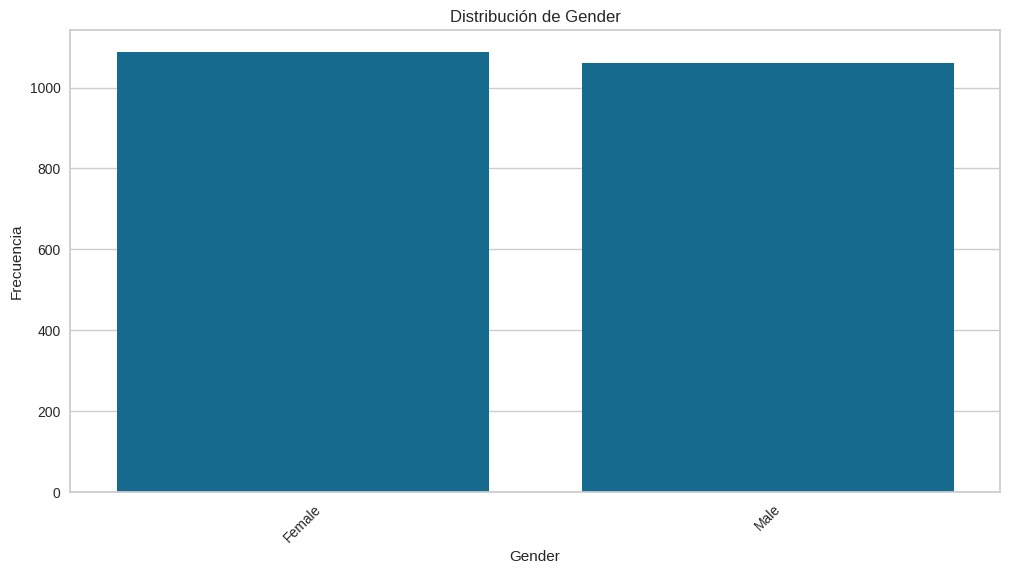

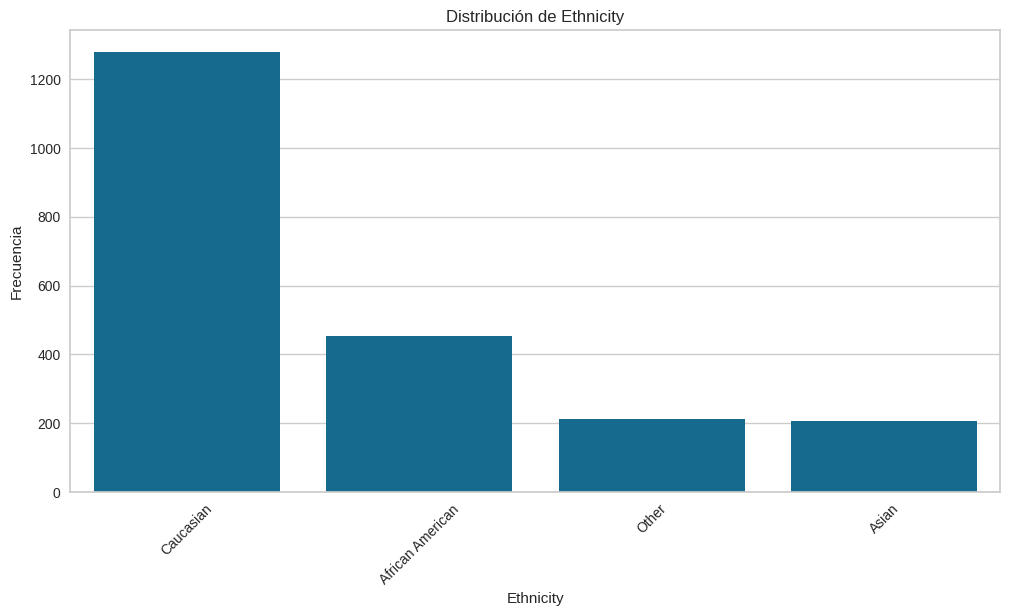

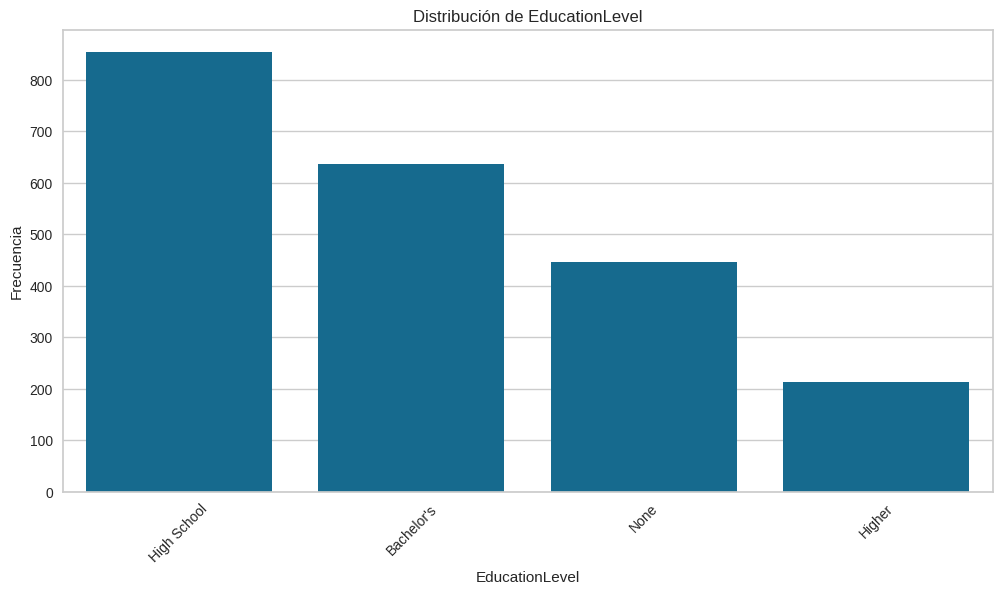

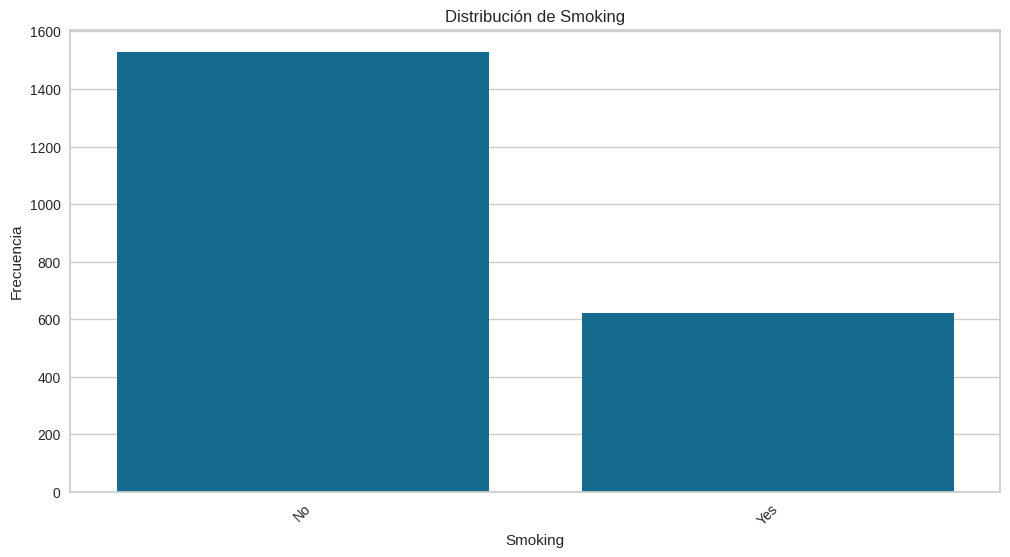

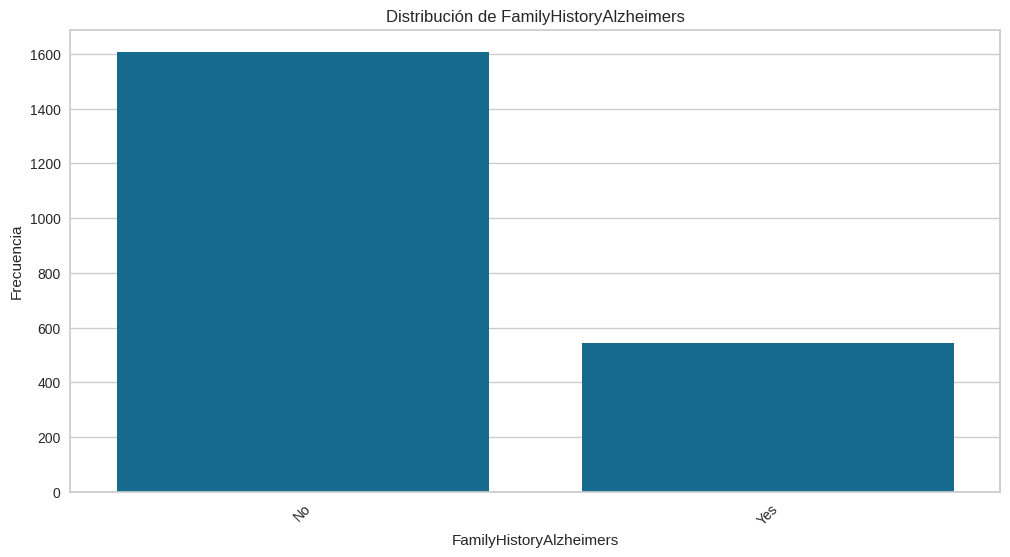

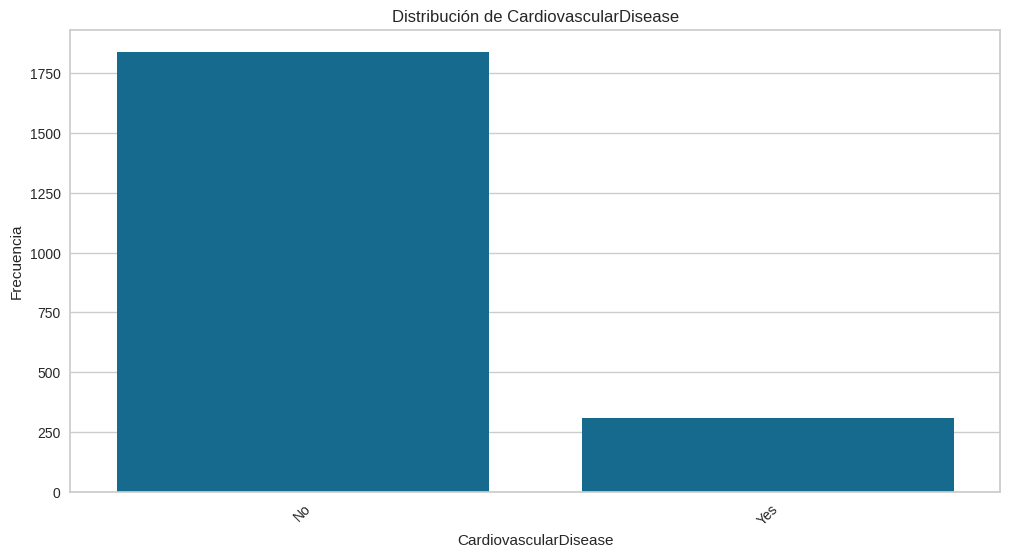

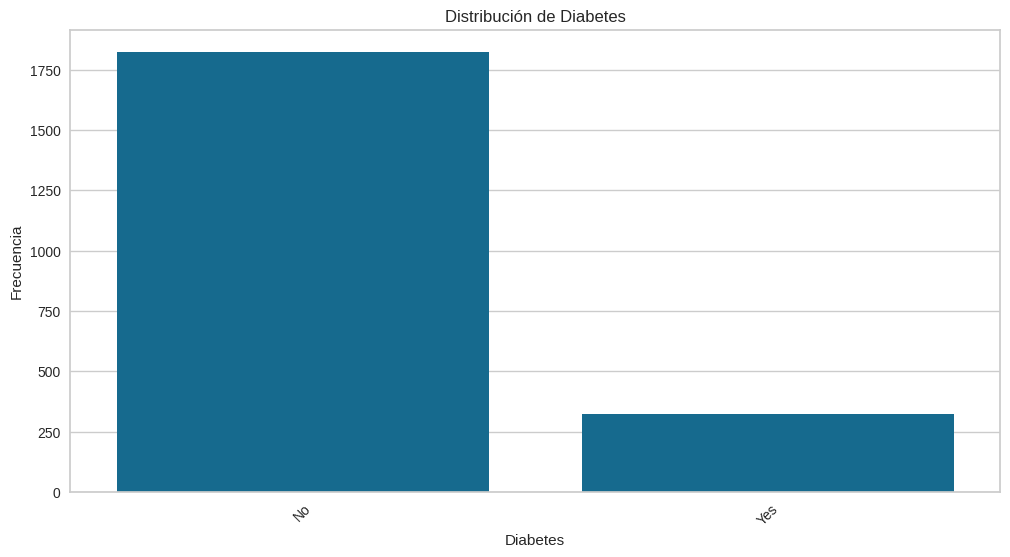

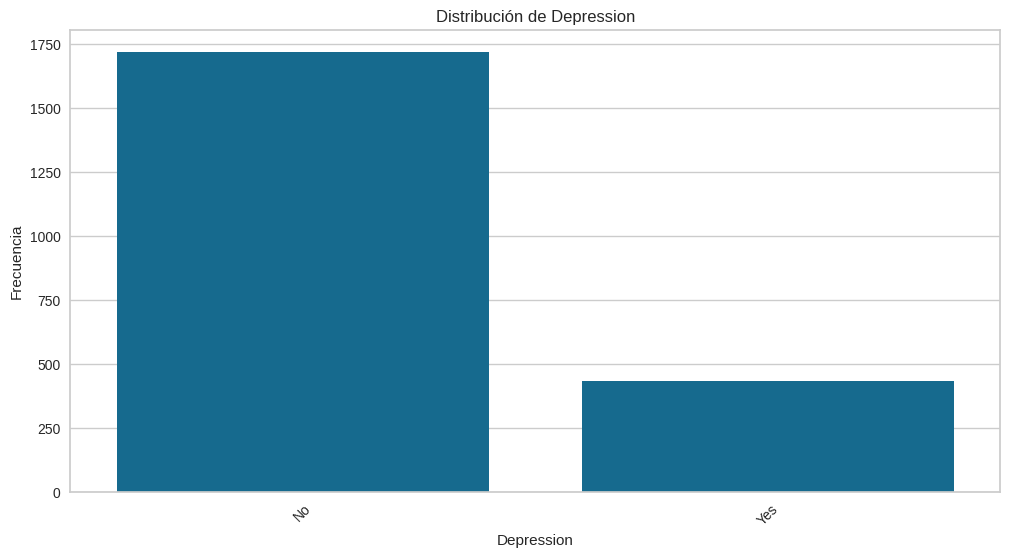

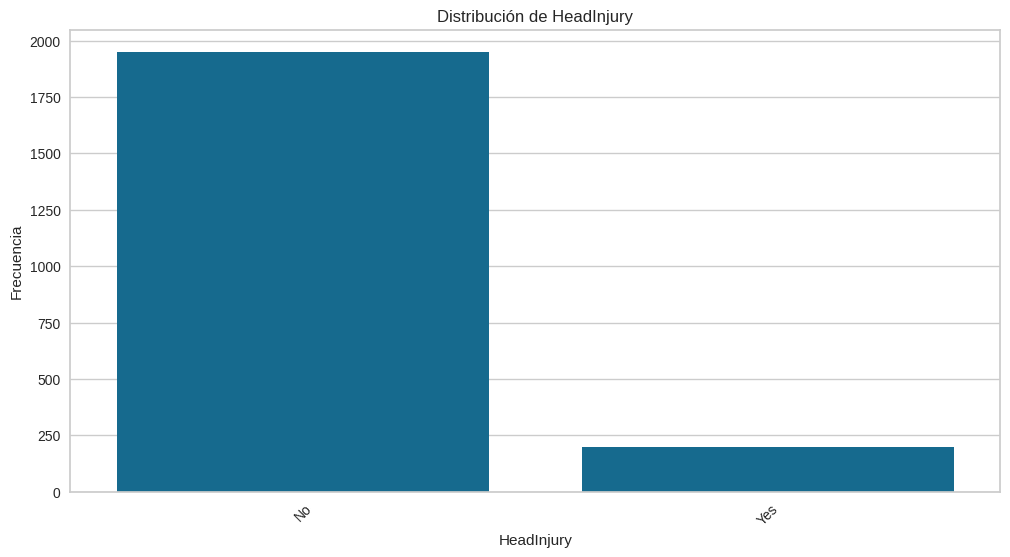

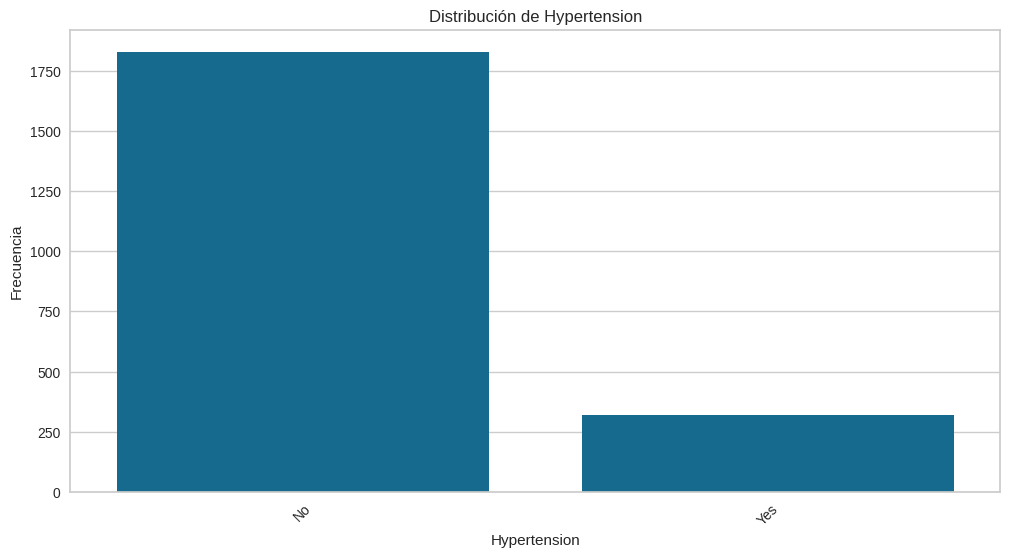

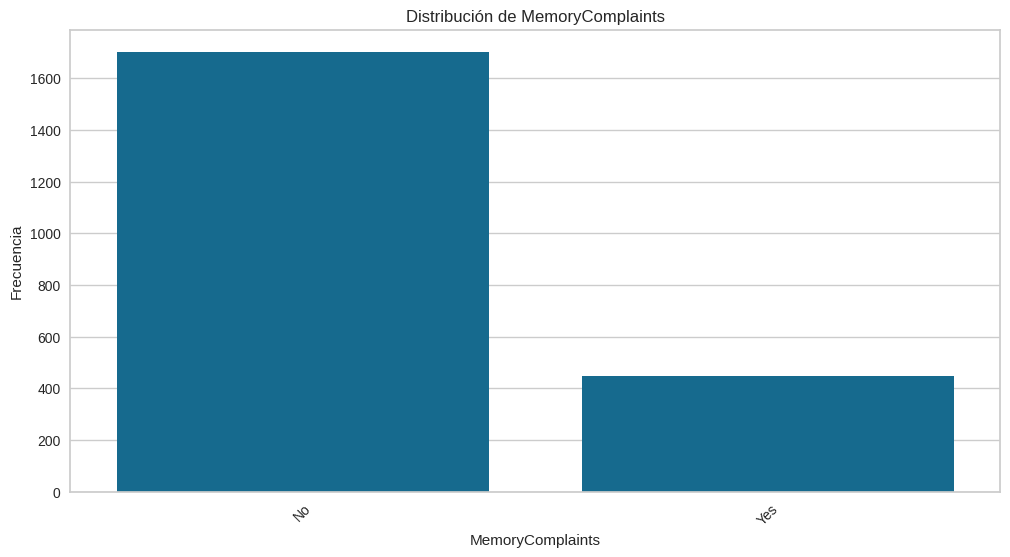

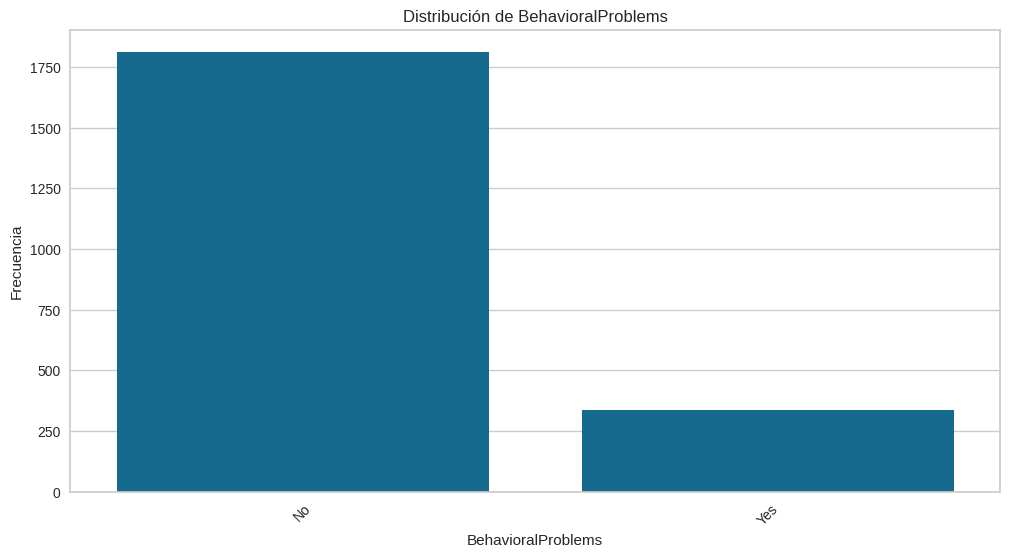

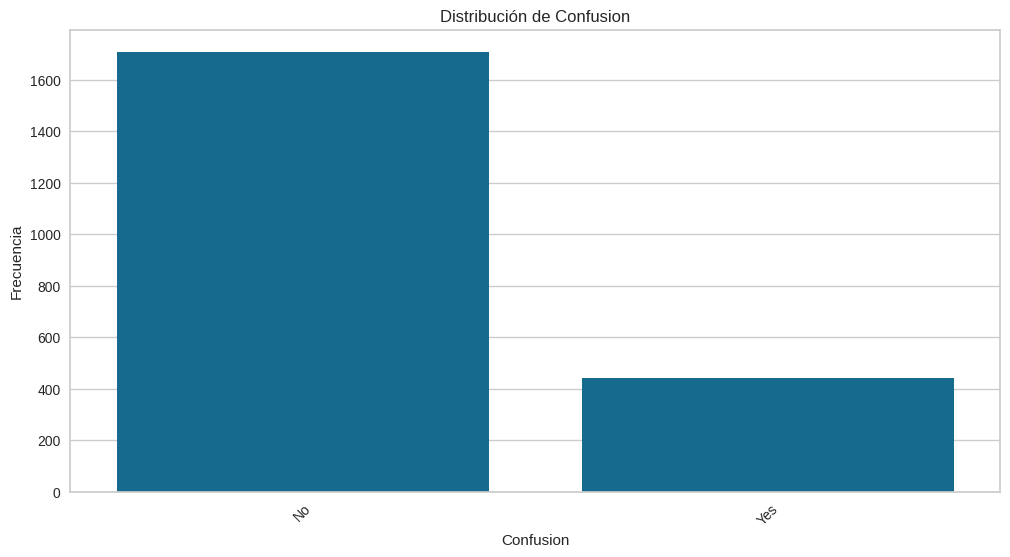

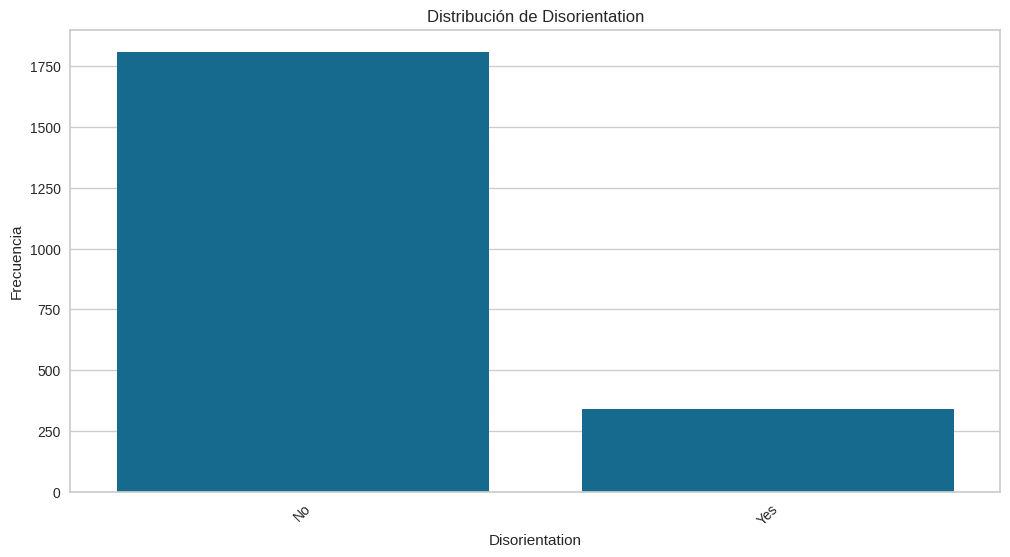

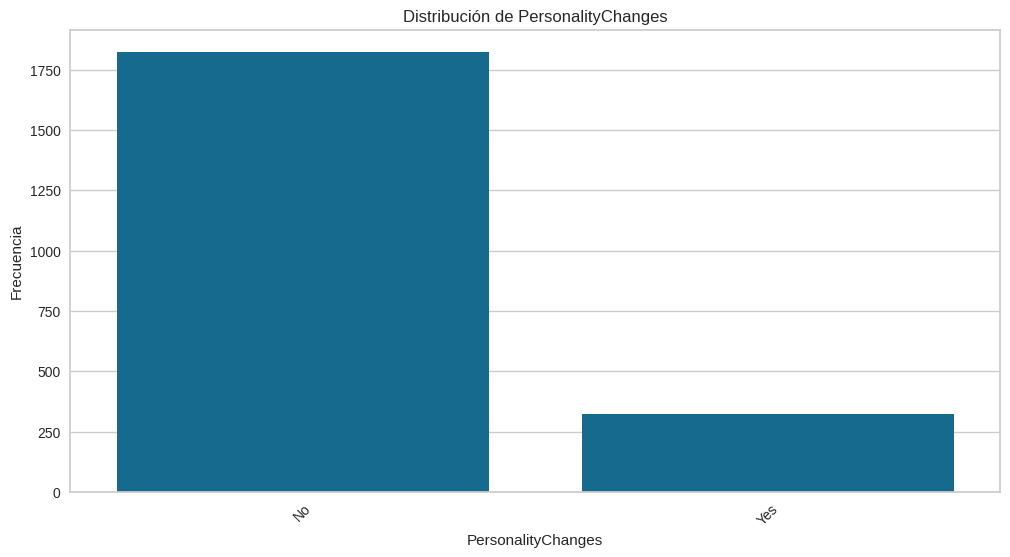

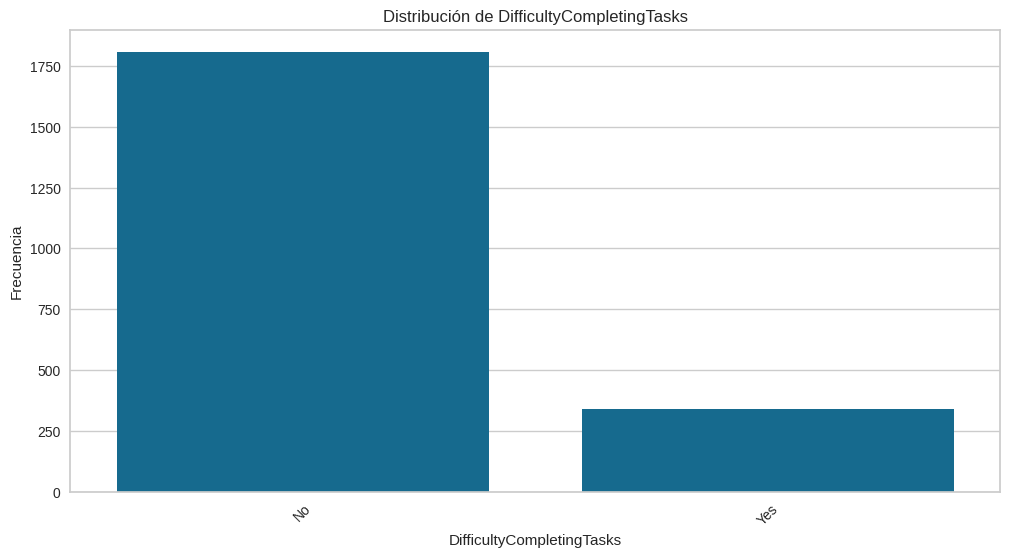

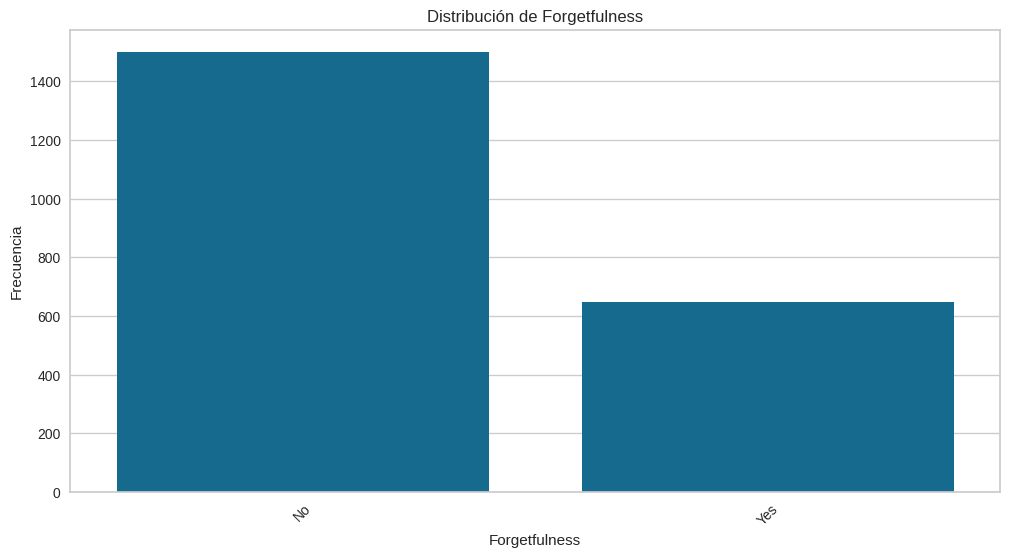

In [ ]:
# Creamos un gráfico de barras para cada variable categórica
for column in columns_to_convert:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df2, order=df2[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

### exploración variables numéricas

In [ ]:
df.describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958,0.353653
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775,0.478214
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288,0.000000
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836,0.000000
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973,0.000000
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490,1.000000
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747,1.000000


*   Edad (Age): La mayoría de los individuos son mayores, con una amplia variabilidad en la edad.

*   Índice de Masa Corporal (BMI): La mayoría está en la categoría de sobrepeso u obesidad, con alta variabilidad en los valores.

*   Consumo de Alcohol (AlcoholConsumption): El consumo promedio es moderado, pero hay una alta variabilidad entre los individuos.

*   Actividad Física (PhysicalActivity): Los niveles promedio de actividad física son moderados, con gran variabilidad.

*   Calidad de la Dieta (DietQuality): La calidad promedio de la dieta es baja, con una considerable variabilidad.

*   Calidad del Sueño (SleepQuality): La calidad promedio del sueño es buena, con una variabilidad moderada.

*   Presión Arterial Sistólica (SystolicBP): Los valores promedio son altos, con gran variabilidad entre los individuos.

*   Presión Arterial Diastólica (DiastolicBP): Los valores promedio también son altos, con alta variabilidad.

*   Colesterol Total (CholesterolTotal): Los niveles promedio son relativamente altos, con gran variabilidad.

*   Colesterol LDL (CholesterolLDL): Los niveles promedio de LDL son preocupantes, con alta variabilidad.

*   Colesterol HDL (CholesterolHDL): El colesterol HDL promedio es alto, con una considerable variabilidad.

*   Triglicéridos (CholesterolTriglycerides): Los niveles promedio de triglicéridos son altos, con gran variabilidad.

*   MMSE (MMSE): La puntuación media sugiere un bajo nivel de función cognitiva, con amplia variabilidad en las puntuaciones.

*   Evaluación Funcional (FunctionalAssessment): La evaluación funcional promedio muestra una gama moderada de capacidad funcional, con alta variabilidad.

*   ADL (ADL): El nivel de independencia en las actividades de la vida diaria es moderado, con gran variabilidad.

*   Diagnóstico (Diagnosis): Hay una mayoría de casos sin diagnóstico frente a los diagnosticados.


In [ ]:
# Lista de variables numéricas
numeric_columns = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'
]
numeric_columns_diagnosis = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL', 'Diagnosis'
]
#Incluyo Diagnosis porque luego viene bien para la matriz de correlación
numeric_columns_no_age = [
    'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'
]

<Figure size 1200x600 with 0 Axes>

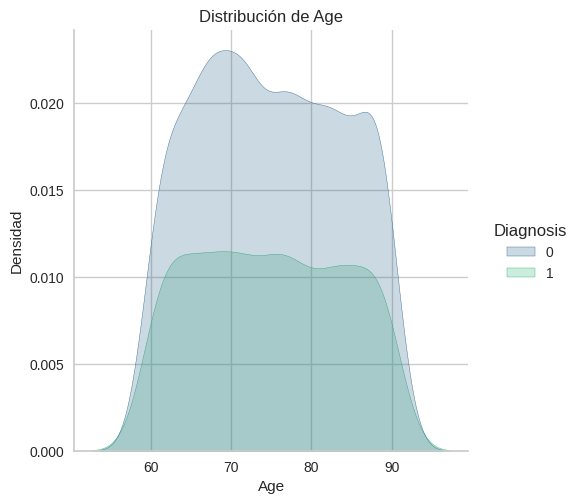

<Figure size 1200x600 with 0 Axes>

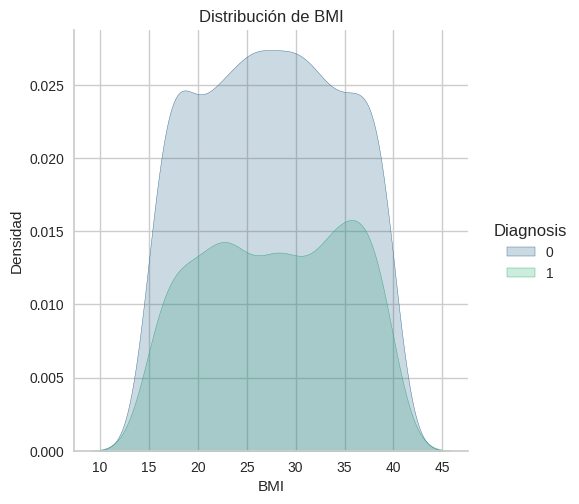

<Figure size 1200x600 with 0 Axes>

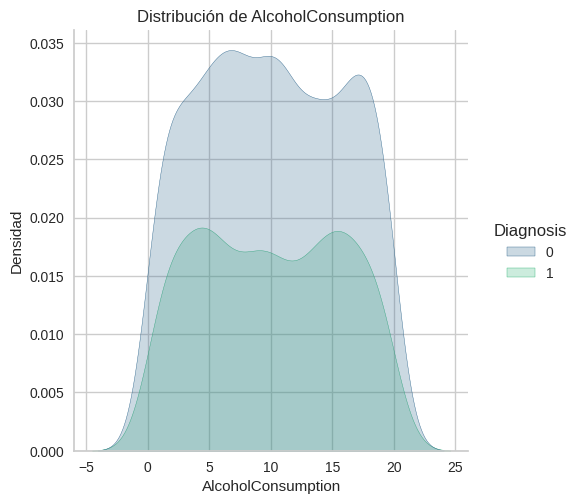

<Figure size 1200x600 with 0 Axes>

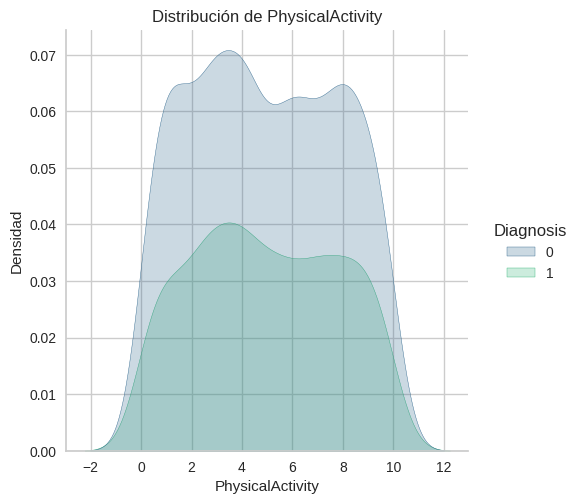

<Figure size 1200x600 with 0 Axes>

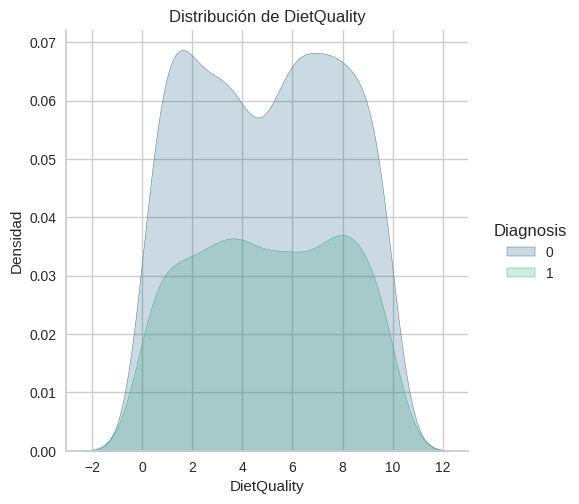

<Figure size 1200x600 with 0 Axes>

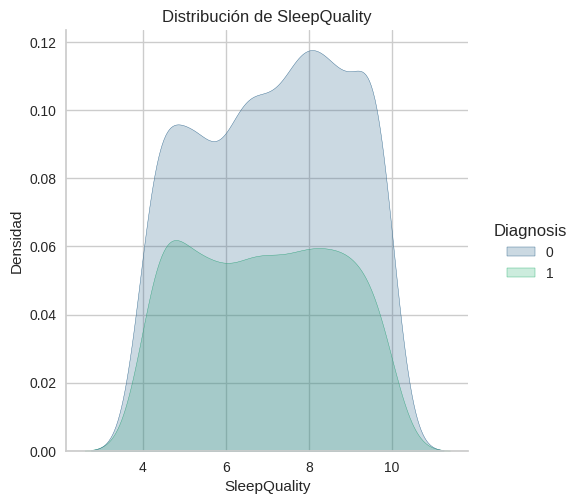

<Figure size 1200x600 with 0 Axes>

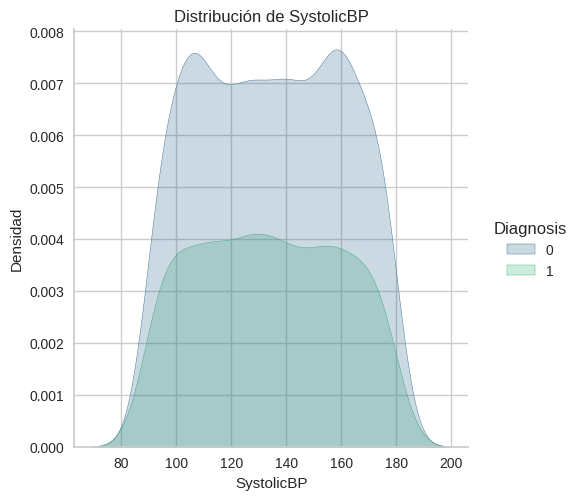

<Figure size 1200x600 with 0 Axes>

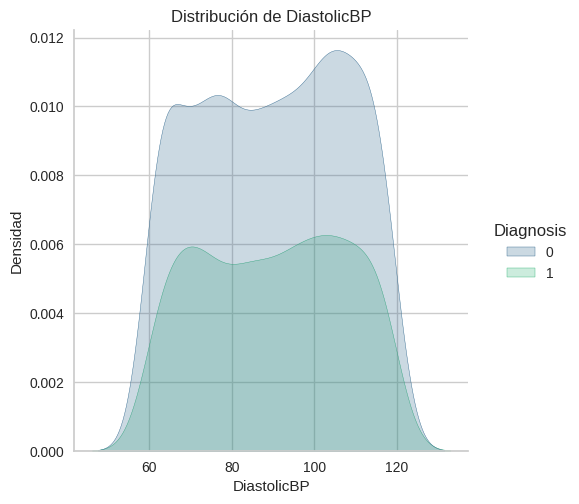

<Figure size 1200x600 with 0 Axes>

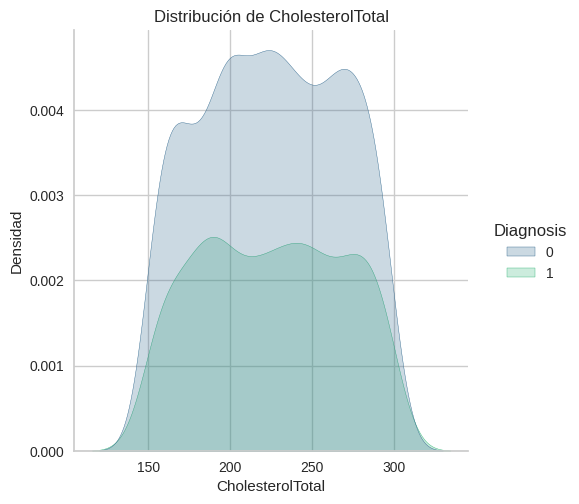

<Figure size 1200x600 with 0 Axes>

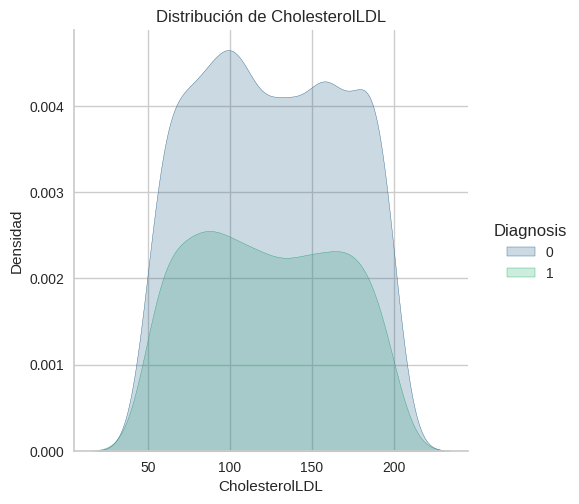

<Figure size 1200x600 with 0 Axes>

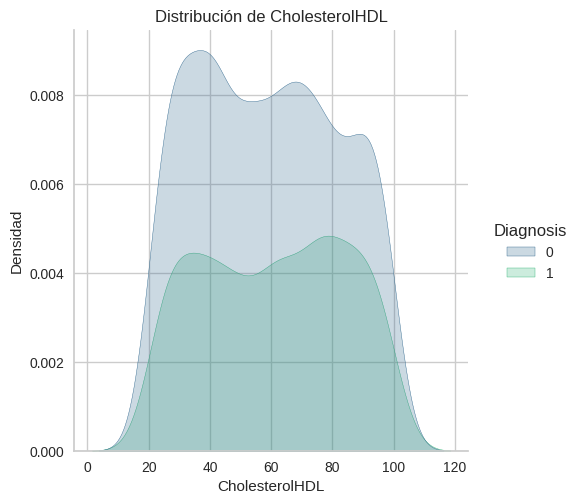

<Figure size 1200x600 with 0 Axes>

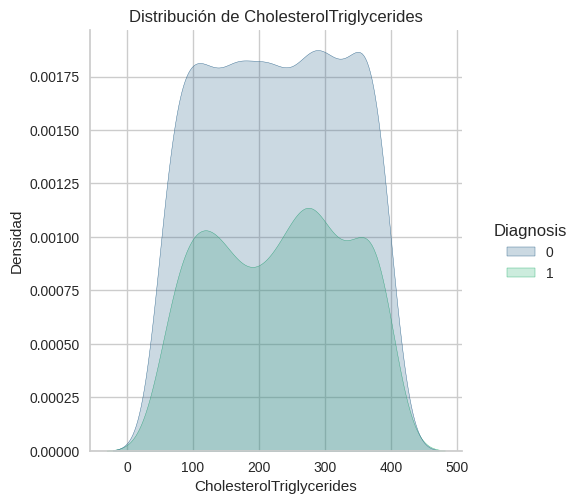

<Figure size 1200x600 with 0 Axes>

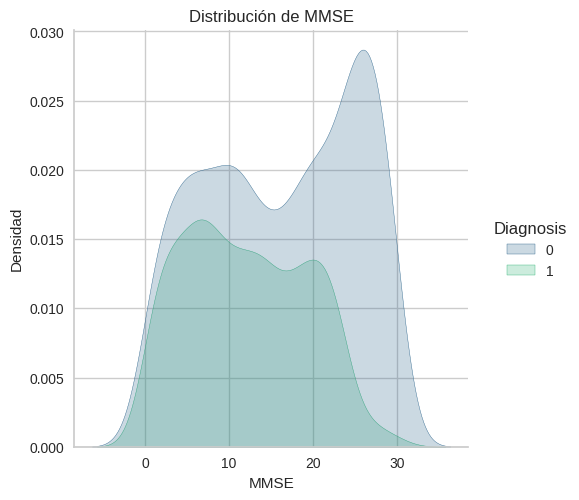

<Figure size 1200x600 with 0 Axes>

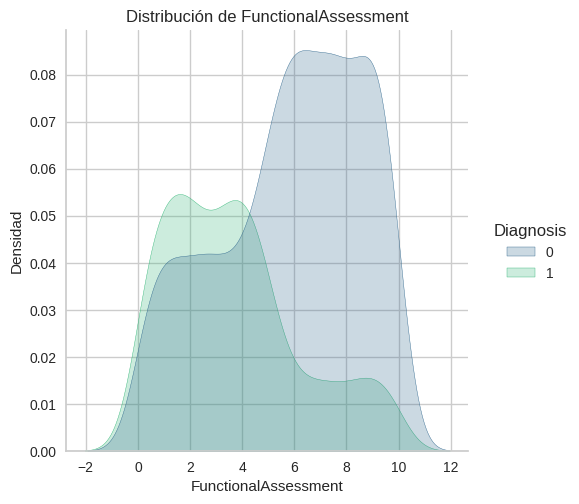

<Figure size 1200x600 with 0 Axes>

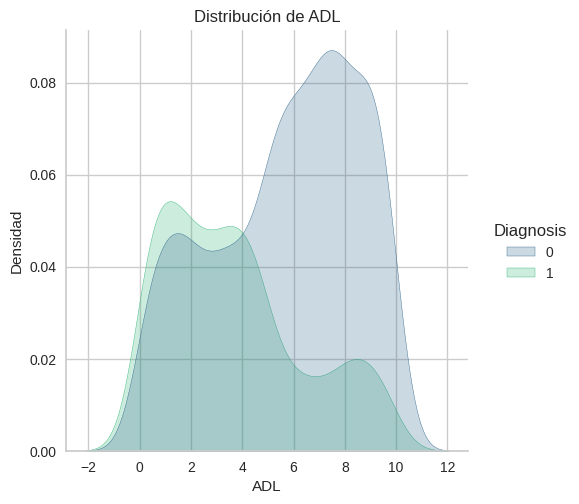

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.displot(data=df, x=column, kind="kde", fill=True, hue="Diagnosis", palette="viridis")
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.show()

Según las formas de las curvas, las variables que podrían tener relevancia según su distribución serían:

*   MMSE. La distribución muestra que los valores entre 20 y 30 tienen una densidad significativa. Los valores dentro de este rango pueden ser indicativos de diferencias importantes entre las clases de Diagnosis. Podría ser una variable relevante para distinguir entre los grupos con y sin Alzheimer..
*   Functional Assessment. La densidad es notable en el rango de 4 a 12. Las diferencias en la capacidad funcional en este rango podrían ser útiles para distinguir entre las clases de diagnóstico, ya que puede reflejar la severidad de los síntomas o el impacto funcional del Alzheimer.
*   ADL. La densidad es prominente entre 4 y 20. Los valores en este rango pueden representar diferencias en la capacidad para realizar actividades diarias, lo cual es importante en el diagnóstico y evaluación del Alzheimer.

Para verificar este análisis creamos los histogramas de las variables numéricas a ver si encontramos algo significativo.

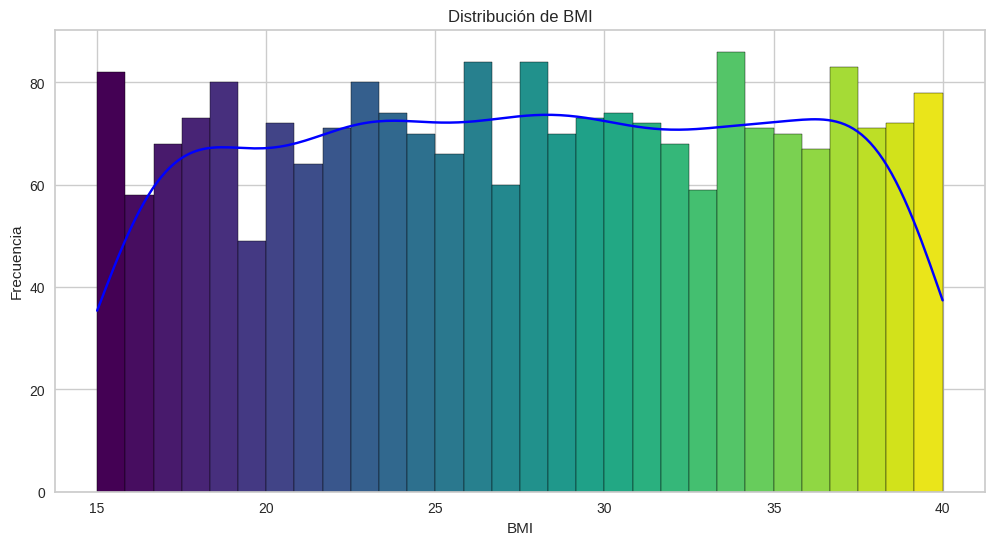

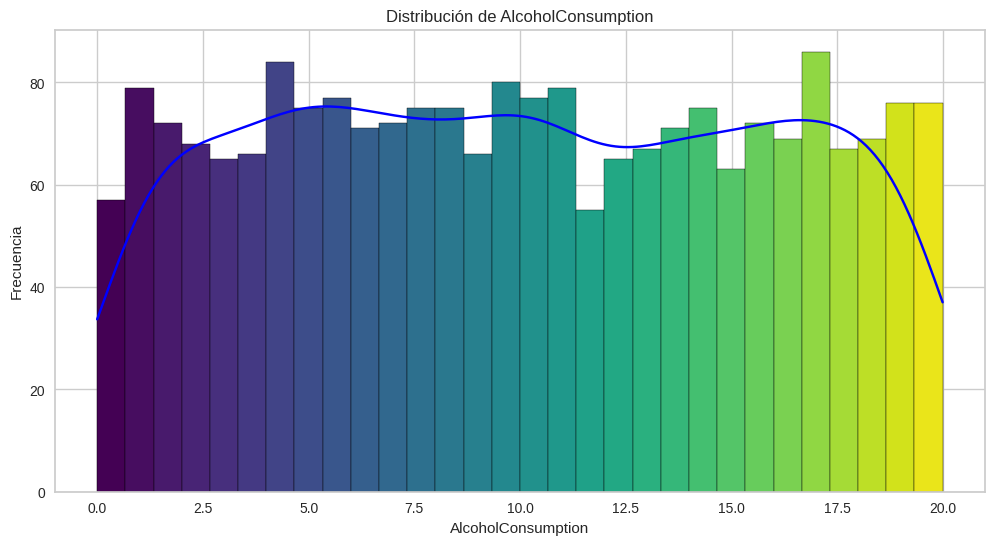

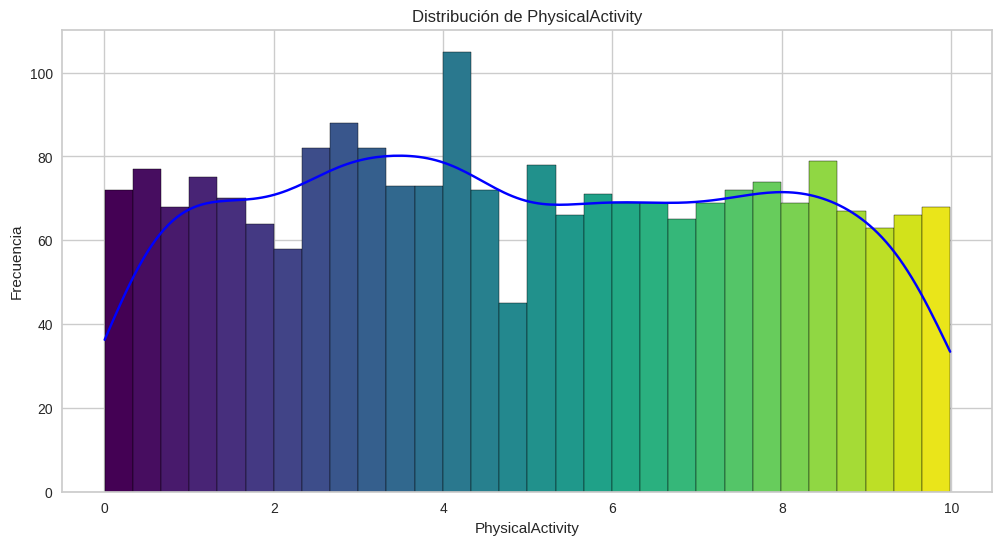

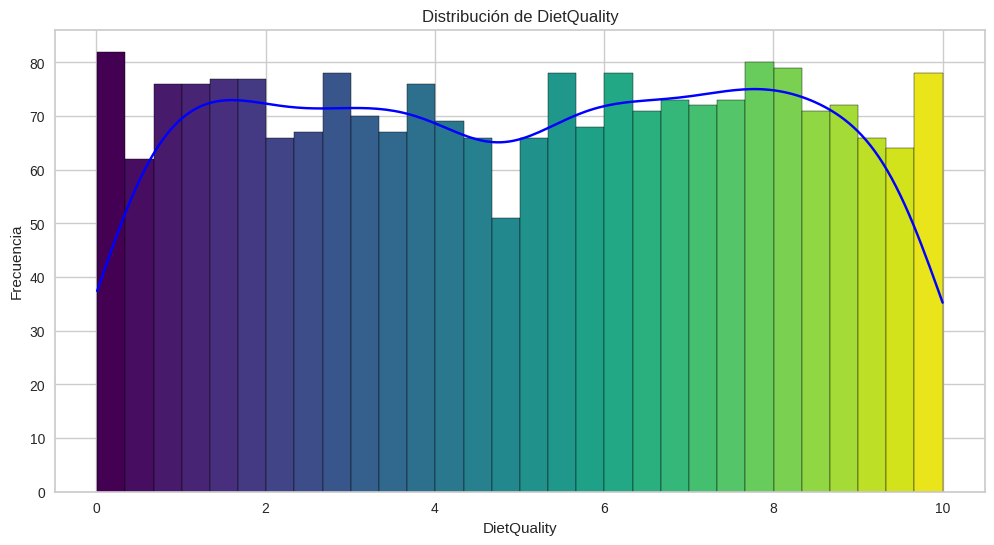

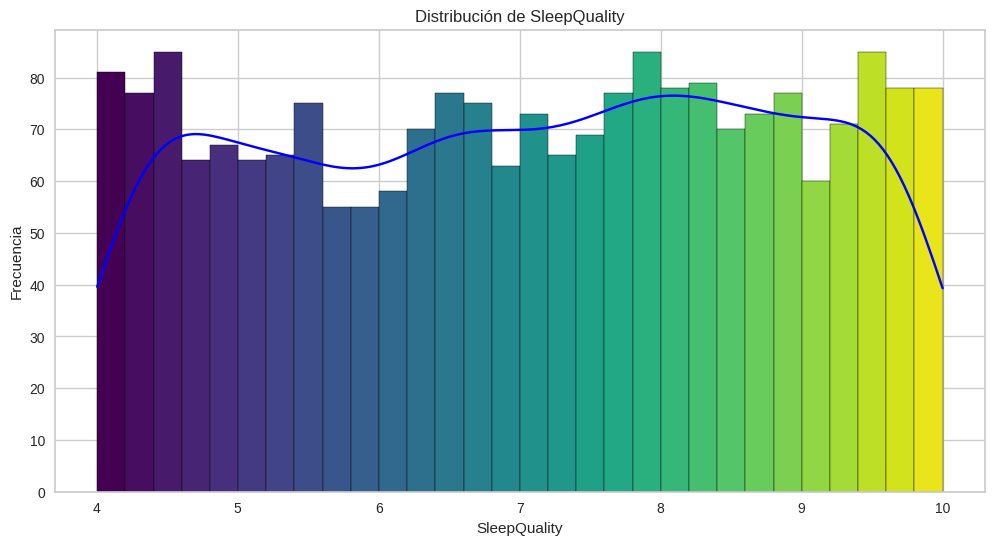

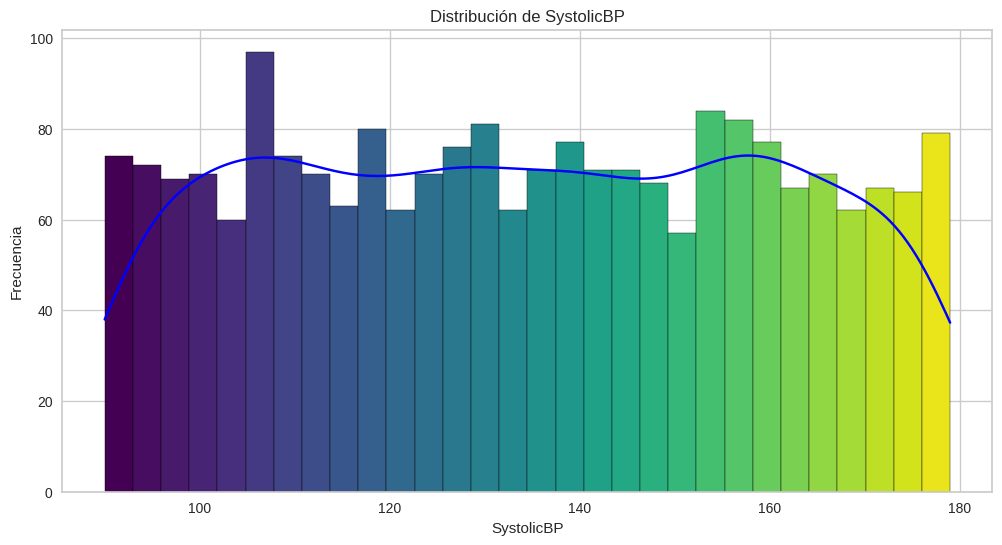

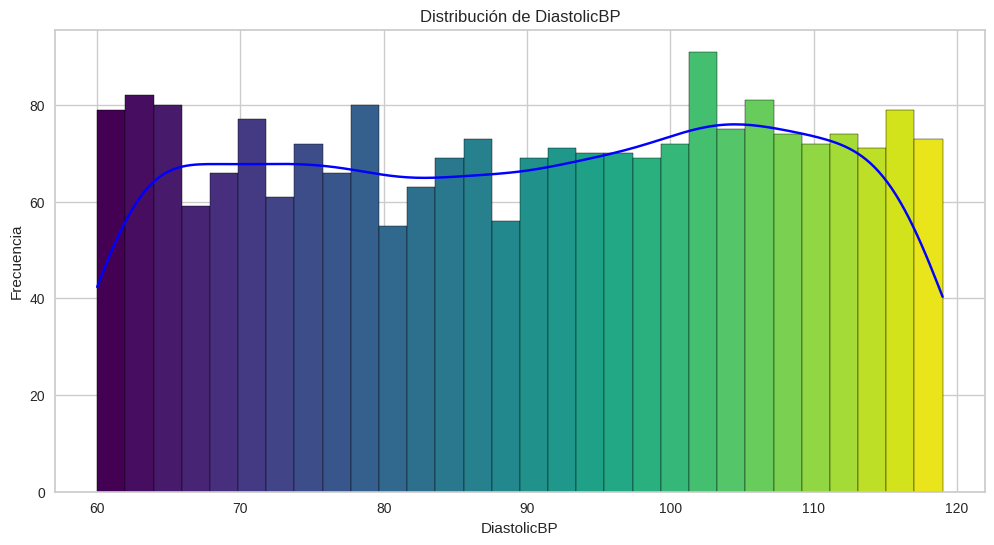

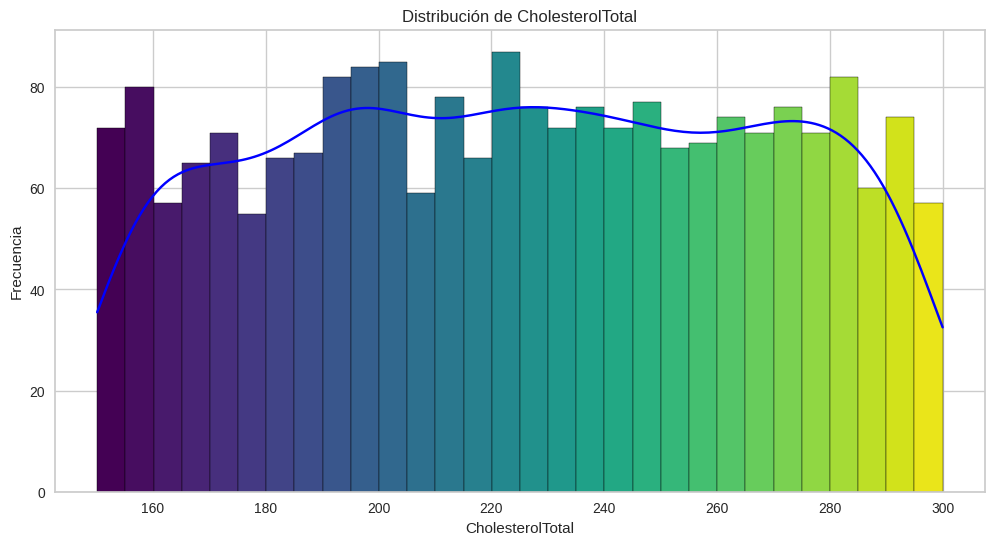

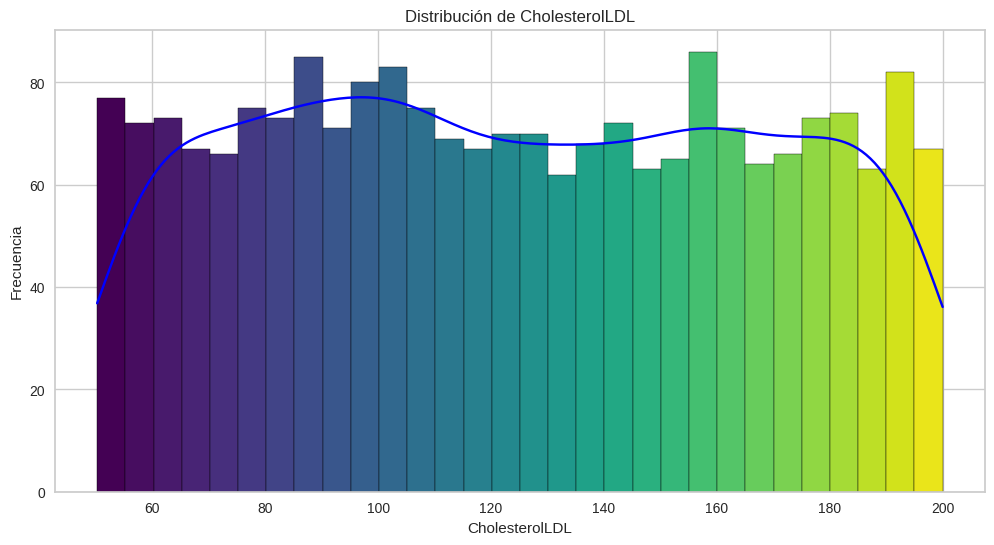

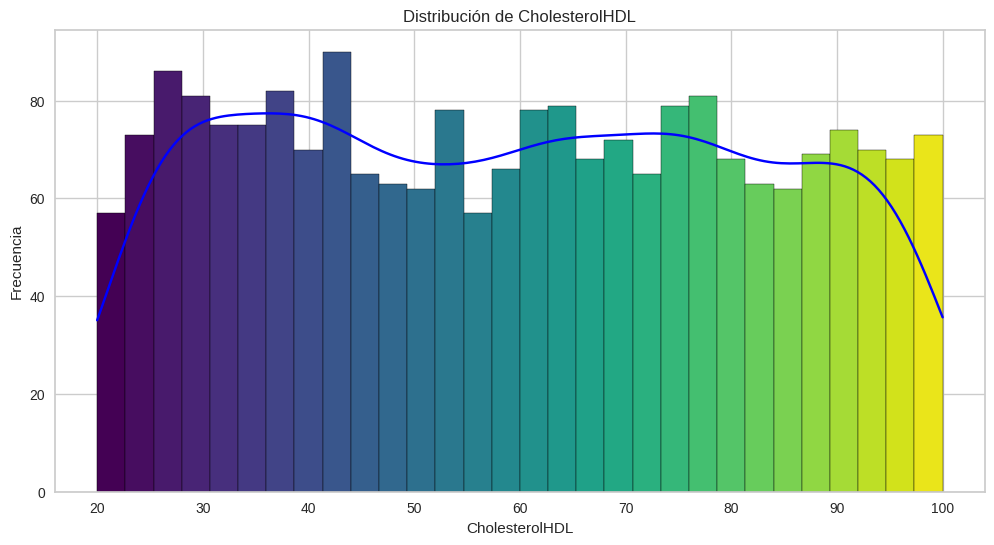

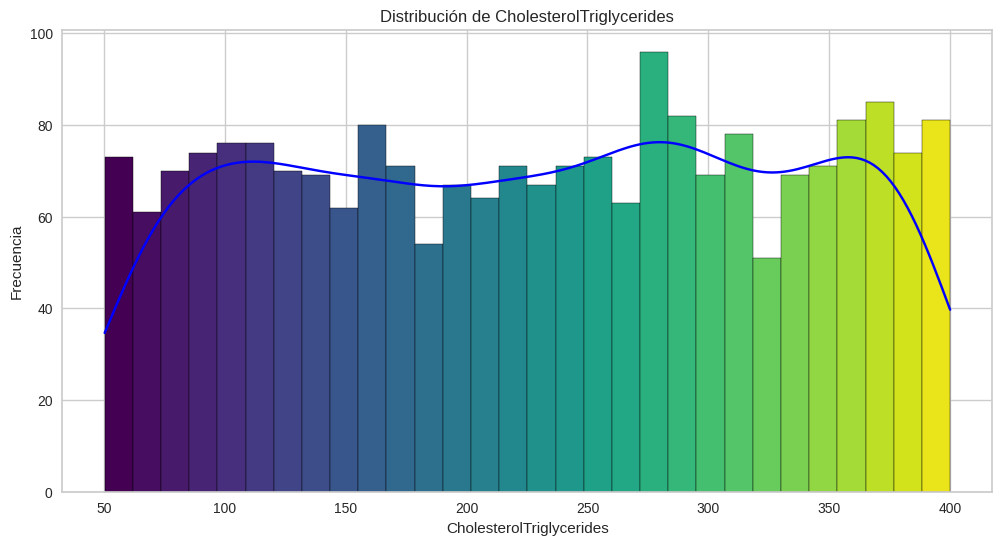

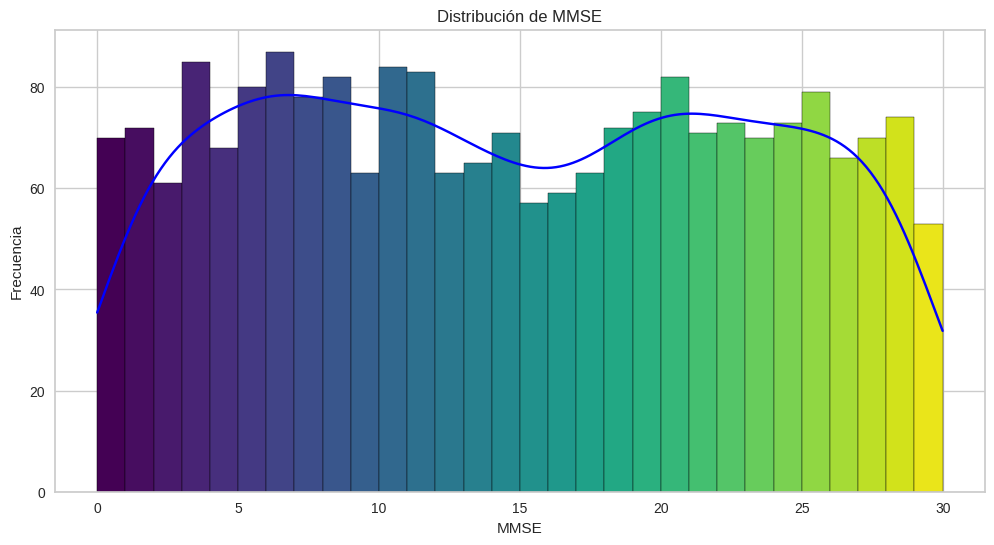

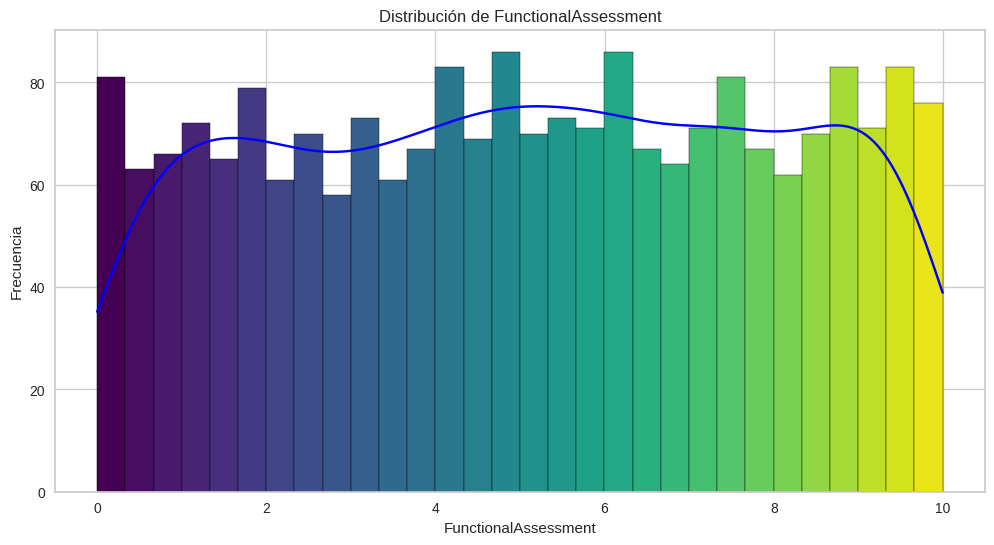

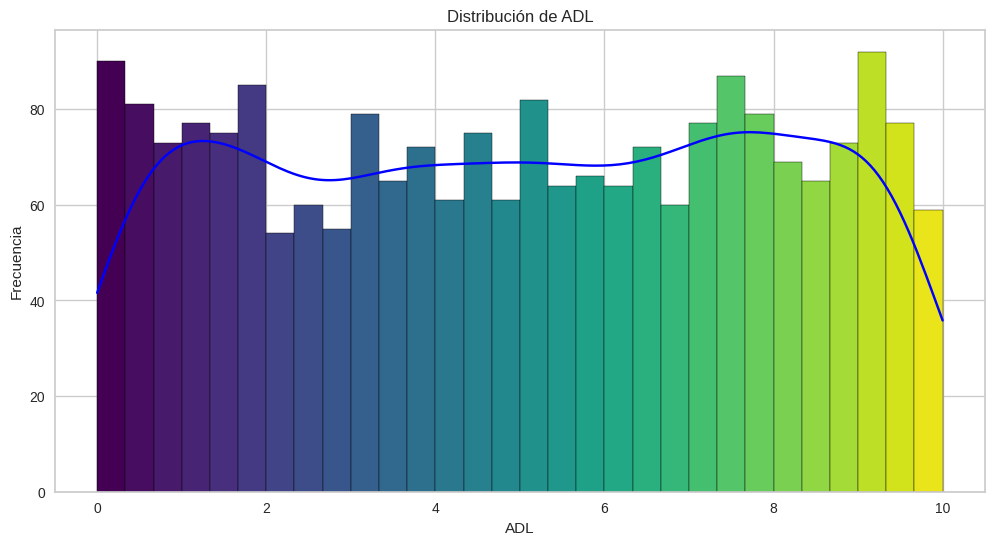

In [ ]:
# Creamos histogramas con gradiente de colores
for column in numeric_columns_no_age:
    plt.figure(figsize=(12, 6))

    # Frecuencias
    data = df[column]
    n_bins = 30
    counts, bins = np.histogram(data, bins=n_bins)

    # Colores
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i / n_bins) for i in range(n_bins)]

    # Histograma
    sns.histplot(data, bins=n_bins, kde=True, color='blue')

    # Aplicamos el gradiente de colores a las barras
    for patch, color in zip(plt.gca().patches, colors):
        patch.set_facecolor(color)

    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

En general no vemos nada preocupante.

Aún así vamos a revisar la variable edad y la variable género.

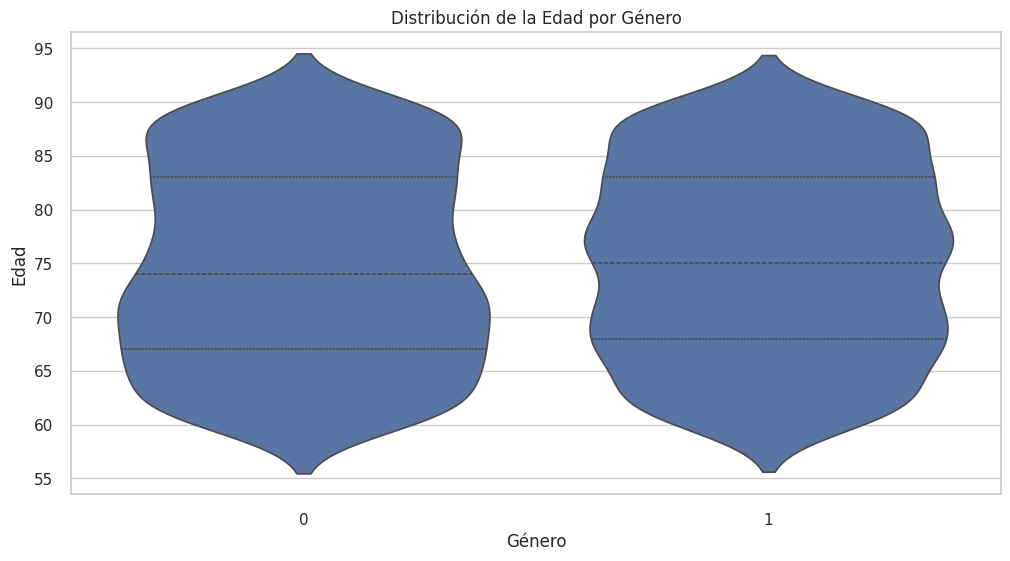

In [ ]:
# Estilo
sns.set(style="whitegrid")

# Gráfico de violín para Age y Gender
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Age', data=df, inner='quartile')

plt.title('Distribución de la Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')

plt.show()

### Matriz de correlación

In [ ]:
# Calculamos la matriz de correlación para las variables numéricas
corr_matrix = df[numeric_columns_diagnosis].corr()

fig = px.imshow(corr_matrix, text_auto=True, title='Correlation Matrix', template="plotly_dark")

fig.update_layout(
    autosize=False,
    width=1200,
    height=1200,
    margin=dict(l=100, r=100, b=100, t=100, pad=4)
)

fig.show()

In [ ]:
# Convertimos la matriz en un DataFrame de correlaciones altas
# Utilizamos abs() para considerar tanto las correlaciones positivas como negativas
corr_pairs = corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

# Excluimos las correlaciones de las variables consigo mismas (correlación = 1)
sorted_corr_pairs = sorted_corr_pairs[sorted_corr_pairs < 1]

# 10 correlaciones más altas
top_corr = sorted_corr_pairs.head(10)

# Las más altas
for (var1, var2), corr in top_corr.items():
    print(f"Correlación entre {var1} y {var2}: {corr:.8f}")

Correlación entre FunctionalAssessment y ADL: 0.05390426
Correlación entre ADL y FunctionalAssessment: 0.05390426
Correlación entre SleepQuality y DietQuality: 0.05129523
Correlación entre DietQuality y SleepQuality: 0.05129523
Correlación entre Age y SleepQuality: 0.04913918
Correlación entre SleepQuality y Age: 0.04913918
Correlación entre Diagnosis y CholesterolHDL: 0.04258404
Correlación entre CholesterolHDL y Diagnosis: 0.04258404
Correlación entre CholesterolHDL y BMI: 0.03860470
Correlación entre BMI y CholesterolHDL: 0.03860470


Las correlaciones son preocupantemente bastante bajas, lo que indica que no hay una relación lineal fuerte entre estas variables. Las correlaciones más altas están alrededor de 0.05, lo cual es bastante bajo y no sugiere una conexión significativa.

Aquí algunas observaciones:

*   **FunctionalAssessment** y **ADL**: Esta correlación es la más alta, pero sigue siendo baja, sugiriendo que ambas variables están relacionadas, aunque débilmente. Esto puede reflejar que la funcionalidad diaria (ADL) está ligeramente influenciada por la evaluación funcional general.

*   **SleepQuality** y **DietQuality**: La correlación entre la calidad del sueño y la calidad de la dieta también es débil, lo que sugiere que estos dos factores no están directamente relacionados de manera significativa.

*   **Age** y **SleepQuality**: La relación entre la edad y la calidad del sueño es baja, lo que implica que, aunque el sueño podría cambiar con la edad, este dataset no muestra una relación clara.

*   **Diagnosis** y **CholesterolHDL**: La correlación entre el diagnóstico de Alzheimer y el colesterol HDL es bastante baja, lo que sugiere que el colesterol "bueno" no tiene una relación fuerte con el riesgo de Alzheimer en este conjunto de datos.

*   **BMI** y **CholesterolHDL**: El índice de masa corporal (BMI) tiene una correlación baja con el colesterol HDL, lo cual es esperado, ya que el colesterol HDL suele estar más influenciado por factores como la dieta y la actividad física.

En resumen, las correlaciones más altas en este análisis no muestran relaciones fuertes entre las variables numéricas y el diagnóstico de Alzheimer. Esto puede indicar que factores más complejos, o interacciones entre variables, pueden estar jugando un papel importante en el riesgo de la enfermedad, lo que requiere enfoques más avanzados, como el uso de modelos predictivos.

In [ ]:
# 10 correlaciones más bajas
bot_corr = sorted_corr_pairs.tail(10)

for (var1, var2), corr in bot_corr.items():
    print(f"Correlación entre {var1} y {var2}: {corr:.8f}")

Correlación entre ADL y Age: -0.03865756
Correlación entre Age y ADL: -0.03865756
Correlación entre SleepQuality y Diagnosis: -0.05654809
Correlación entre Diagnosis y SleepQuality: -0.05654809
Correlación entre MMSE y Diagnosis: -0.23712561
Correlación entre Diagnosis y MMSE: -0.23712561
Correlación entre ADL y Diagnosis: -0.33234592
Correlación entre Diagnosis y ADL: -0.33234592
Correlación entre FunctionalAssessment y Diagnosis: -0.36489831
Correlación entre Diagnosis y FunctionalAssessment: -0.36489831


Las correlaciones más bajas (negativas) muestran relaciones inversas entre ciertas variables y el diagnóstico de Alzheimer. Aquí las interpretaciones clave:

*   **ADL** y **Age**: Aunque la correlación es muy baja (-0.0386), indica que a medida que aumenta la edad, hay una leve disminución en la capacidad para realizar actividades de la vida diaria (ADL). Sin embargo, esta relación es prácticamente insignificante.

*   **SleepQuality** y **Diagnosis**: La calidad del sueño tiene una correlación negativa muy débil con el diagnóstico de Alzheimer (-0.0565). Esto sugiere que a medida que se empeora la calidad del sueño, podría haber un aumento mínimo en la probabilidad de un diagnóstico de Alzheimer, pero la relación es muy leve.

*   **MMSE** y **Diagnosis**: Aquí vemos una correlación negativa más notable (-0.2371). Esto indica que puntajes más bajos en el test de MMSE están asociados con una mayor probabilidad de un diagnóstico de Alzheimer, lo cual es consistente con lo esperado, ya que el MMSE mide deterioro cognitivo.

*   **ADL** y **Diagnosis**: Esta correlación (-0.3323) sugiere que las personas con Alzheimer tienden a tener mayores dificultades para realizar actividades diarias (ADL), lo cual es una señal importante del deterioro funcional asociado con la enfermedad.

*   **FunctionalAssessment** y **Diagnosis**: La correlación negativa más fuerte (-0.3649) indica que las personas que obtienen puntuaciones más bajas en la evaluación funcional general tienen más probabilidades de ser diagnosticadas con Alzheimer. Esto es coherente con la idea de que el deterioro funcional es un indicador clave de la enfermedad.

Las correlaciones negativas más destacadas están relacionadas con Diagnosis y variables funcionales/cognitivas, como ADL, FunctionalAssessment y MMSE, lo que refuerza que un peor desempeño en estas áreas está asociado con un mayor riesgo de Alzheimer.

In [ ]:
# Buscamos correlaciones con Diagnosis directamente
diagnosis_corr = corr_matrix['Diagnosis'].sort_values(ascending=False)

print("Correlaciones con Diagnosis:")
for var, corr in diagnosis_corr.items():
    if var != 'Diagnosis':  # Excluir la correlación consigo misma
        print(f"Correlación entre Diagnosis y {var}: {corr:.8f}")

Correlaciones con Diagnosis:
Correlación entre Diagnosis y CholesterolHDL: 0.04258404
Correlación entre Diagnosis y BMI: 0.02634281
Correlación entre Diagnosis y CholesterolTriglycerides: 0.02267188
Correlación entre Diagnosis y DietQuality: 0.00850577
Correlación entre Diagnosis y CholesterolTotal: 0.00639446
Correlación entre Diagnosis y PhysicalActivity: 0.00594504
Correlación entre Diagnosis y DiastolicBP: 0.00529268
Correlación entre Diagnosis y Age: -0.00548838
Correlación entre Diagnosis y AlcoholConsumption: -0.00761797
Correlación entre Diagnosis y SystolicBP: -0.01561523
Correlación entre Diagnosis y CholesterolLDL: -0.03197583
Correlación entre Diagnosis y SleepQuality: -0.05654809
Correlación entre Diagnosis y MMSE: -0.23712561
Correlación entre Diagnosis y ADL: -0.33234592
Correlación entre Diagnosis y FunctionalAssessment: -0.36489831


Las correlaciones entre las variables y Diagnosis que has obtenido revelan algunas relaciones interesantes, aunque muchas son bastante débiles. Aquí las correlaciones más destacadas:

**Correlaciones positivas** (aunque débiles):
*   CholesterolHDL: 0.0426
*   BMI: 0.0263
*   CholesterolTriglycerides: 0.0227
Estas correlaciones positivas son muy débiles, lo que sugiere que no hay una relación significativa entre estas variables y el diagnóstico de Alzheimer en tu conjunto de datos.

**Correlaciones negativas más fuertes**:
*   FunctionalAssessment: -0.3649
*   ADL: -0.3323
*   MMSE: -0.2371
Estas correlaciones negativas más fuertes son las más importantes. Indican que a medida que las personas tienen un peor desempeño en FunctionalAssessment, ADL, y MMSE, la probabilidad de un diagnóstico de Alzheimer aumenta significativamente.

El análisis muestra que las variables relacionadas con la funcionalidad y el desempeño cognitivo (FunctionalAssessment, ADL, y MMSE) tienen las correlaciones más fuertes con Diagnosis, lo que es coherente con la naturaleza de la enfermedad de Alzheimer. Las demás correlaciones son débiles, lo que indica que otras variables como colesterol, presión arterial o dieta no están fuertemente relacionadas con el diagnóstico en esta base de datos.

## Estudio de nulls

In [ ]:
# Verificamos valores faltantes
print(df.isnull().sum())

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [ ]:
# Verificamos duplicados
print(df.duplicated().sum())

0


# Preprocesado de datos

###División de datos

In [ ]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dimensiones de los conjuntos de entrenamiento y prueba
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (1719, 32)
Tamaño de X_test: (430, 32)
Tamaño de y_train: (1719,)
Tamaño de y_test: (430,)


Antes de utilizar ningún modelo vamos a usar pycaret para echar un vistazo general.

In [ ]:
model_aprox = setup(data=df, target='Diagnosis', session_id=1)

,Description,Value
0,Session id,1
1,Target,Diagnosis
2,Target type,Binary
3,Original data shape,"(2149, 33)"
4,Transformed data shape,"(2149, 39)"
5,Transformed train set shape,"(1504, 39)"
6,Transformed test set shape,"(645, 39)"
7,Numeric features,15
8,Categorical features,17
9,Preprocess,True


# Entrenamiento de modelos

In [ ]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9588,0.9596,0.9305,0.9533,0.9412,0.9095,0.9102,0.5860
lightgbm,Light Gradient Boosting Machine,0.9588,0.9608,0.9304,0.9527,0.9411,0.9094,0.9099,1.0310
gbc,Gradient Boosting Classifier,0.9534,0.9555,0.9248,0.9436,0.9334,0.8976,0.8985,1.0660
rf,Random Forest Classifier,0.9388,0.9569,0.8666,0.9572,0.9089,0.8631,0.8661,0.7100
ada,Ada Boost Classifier,0.9328,0.9495,0.9022,0.9101,0.9050,0.8531,0.8544,0.7820
dt,Decision Tree Classifier,0.9109,0.9038,0.8797,0.8706,0.8744,0.8054,0.8062,0.2760
et,Extra Trees Classifier,0.8563,0.9322,0.6806,0.8935,0.7686,0.6678,0.6836,0.6270
lr,Logistic Regression,0.8404,0.9095,0.7389,0.7991,0.7643,0.6445,0.6486,1.1030
ridge,Ridge Classifier,0.8391,0.9091,0.7370,0.7941,0.7609,0.6406,0.6445,0.4460
lda,Linear Discriminant Analysis,0.8371,0.9090,0.7426,0.7860,0.7603,0.6377,0.6411,0.4470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

*   Los modelos XGBoost y LightGBM son los mejores en términos de precisión, AUC y tiempo de ejecución, con un balance sólido entre todas las métricas.
*   Gradient Boosting Classifier también ofrece un buen rendimiento, aunque ligeramente inferior a XGBoost y LightGBM.
*   Los modelos más simples, como Logistic Regression y Naive Bayes, tienen un rendimiento aceptable, pero considerablemente inferior.

In [ ]:
# Modelos
print("XGBOOST")
model1 = create_model('xgboost')
print("LIGHT GRADIENT BOOSTING MACHINE")
model2 = create_model('lightgbm')
print("GRADIENT BOOSTING CLASSIFIER")
model3 = create_model('gbc')
print("RANDOM FOREST CLASSIFIER")
model4 = create_model('rf')

XGBOOST


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9470,0.9280,0.8889,0.9600,0.9231,0.8828,0.8843
1,0.9868,0.9828,0.9630,1.0000,0.9811,0.9709,0.9713
2,0.9536,0.9653,0.9623,0.9107,0.9358,0.8996,0.9004
3,0.9801,0.9869,0.9434,1.0000,0.9709,0.9558,0.9568
4,0.9467,0.9547,0.9245,0.9245,0.9245,0.8833,0.8833
5,0.9333,0.9510,0.9057,0.9057,0.9057,0.8541,0.8541
6,0.9733,0.9671,0.9434,0.9804,0.9615,0.9411,0.9415
7,0.9667,0.9572,0.9057,1.0000,0.9505,0.9255,0.9280
8,0.9467,0.9560,0.9434,0.9091,0.9259,0.8843,0.8847


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LIGHT GRADIENT BOOSTING MACHINE


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9470,0.9469,0.8889,0.9600,0.9231,0.8828,0.8843
1,0.9934,0.9876,0.9815,1.0000,0.9907,0.9855,0.9856
2,0.9470,0.9615,0.9434,0.9091,0.9259,0.8847,0.8851
3,0.9868,0.9838,0.9623,1.0000,0.9808,0.9707,0.9711
4,0.9533,0.9543,0.9434,0.9259,0.9346,0.8983,0.8984
5,0.9400,0.9366,0.9057,0.9231,0.9143,0.8681,0.8682
6,0.9733,0.9720,0.9434,0.9804,0.9615,0.9411,0.9415
7,0.9533,0.9601,0.8868,0.9792,0.9307,0.8956,0.8981
8,0.9400,0.9566,0.9245,0.9074,0.9159,0.8693,0.8694


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GRADIENT BOOSTING CLASSIFIER


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9404,0.9395,0.8889,0.9412,0.9143,0.8687,0.8695
1,0.9934,0.9859,0.9815,1.0000,0.9907,0.9855,0.9856
2,0.9603,0.9607,0.9623,0.9273,0.9444,0.9135,0.9139
3,0.9801,0.9702,0.9623,0.9808,0.9714,0.9562,0.9563
4,0.9400,0.9599,0.9245,0.9074,0.9159,0.8693,0.8694
5,0.9333,0.9309,0.9057,0.9057,0.9057,0.8541,0.8541
6,0.9533,0.9590,0.9434,0.9259,0.9346,0.8983,0.8984
7,0.9467,0.9621,0.8491,1.0000,0.9184,0.8792,0.8856
8,0.9333,0.9523,0.9057,0.9057,0.9057,0.8541,0.8541


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RANDOM FOREST CLASSIFIER


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9205,0.9448,0.8148,0.9565,0.8800,0.8212,0.8271
1,0.9669,0.9844,0.9074,1.0000,0.9515,0.9264,0.9289
2,0.9338,0.9648,0.8679,0.9388,0.9020,0.8521,0.8536
3,0.9801,0.9826,0.9434,1.0000,0.9709,0.9558,0.9568
4,0.9333,0.9595,0.8868,0.9216,0.9038,0.8529,0.8532
5,0.9133,0.9416,0.8302,0.9167,0.8713,0.8062,0.8085
6,0.9533,0.9574,0.8868,0.9792,0.9307,0.8956,0.8981
7,0.9267,0.9504,0.7925,1.0000,0.8842,0.8316,0.8436
8,0.9333,0.9484,0.8868,0.9216,0.9038,0.8529,0.8532


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

*   **XGBoost** y **LightGBM**:
Ambos modelos muestran una alta precisión, AUC y F1 Score, lo que indica que están funcionando muy bien en términos de clasificación y generalización.
La elección entre XGBoost y LightGBM podría depender de otros factores como el tiempo de entrenamiento, la interpretabilidad del modelo, o las características específicas del problema.

*   **Gradient Boosting Classifier** (GBC):
Aunque GBC tiene un buen rendimiento, especialmente en términos de precisión y F1 Score, no supera a XGBoost o LightGBM en las métricas clave. Sin embargo, sigue siendo una opción válida.

*   **Random Forest** (RF):
RF tiene un rendimiento ligeramente inferior en comparación con los otros modelos. Sin embargo, sigue siendo una técnica robusta, especialmente si se valora la interpretabilidad del modelo o la capacidad de manejar datos con muchas características.

XGBOOST


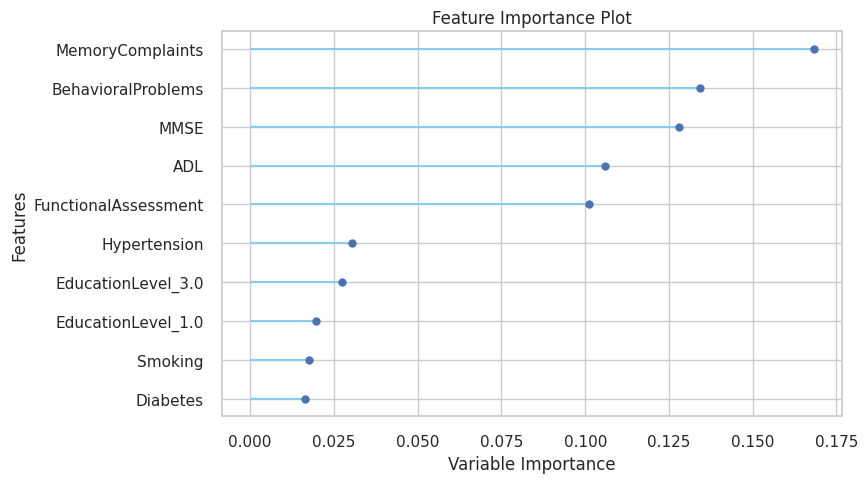

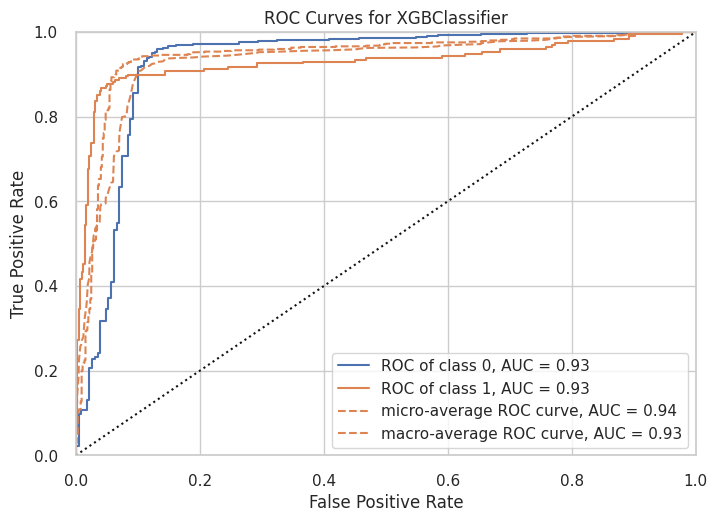

In [ ]:
print("XGBOOST")
plot_model(model1, plot="feature")
plot_model(model1, plot="auc")

LIGHT GRADIENT BOOSTING MACHINE


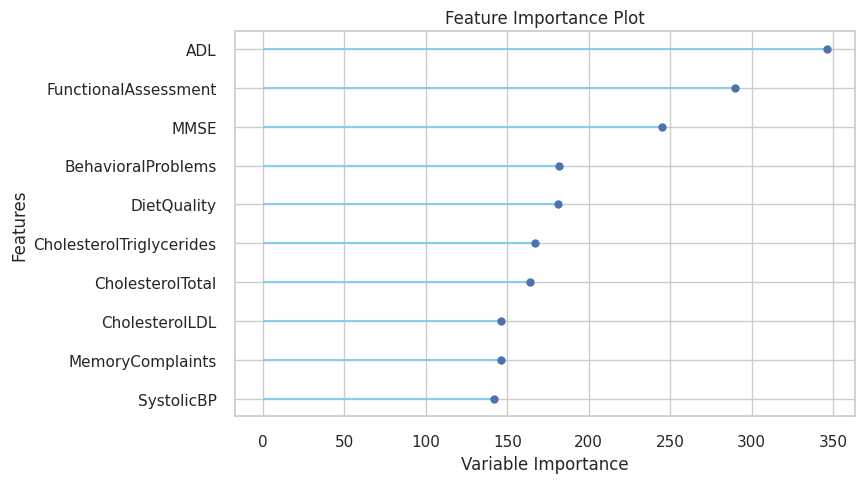

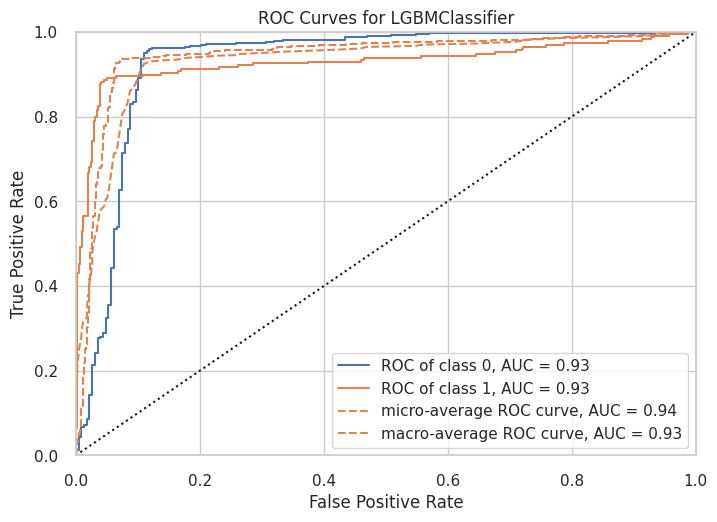

In [ ]:
print("LIGHT GRADIENT BOOSTING MACHINE")
plot_model(model2, plot='feature')
plot_model(model2, plot='auc')

GRADIENT BOOSTING CLASSIFIER


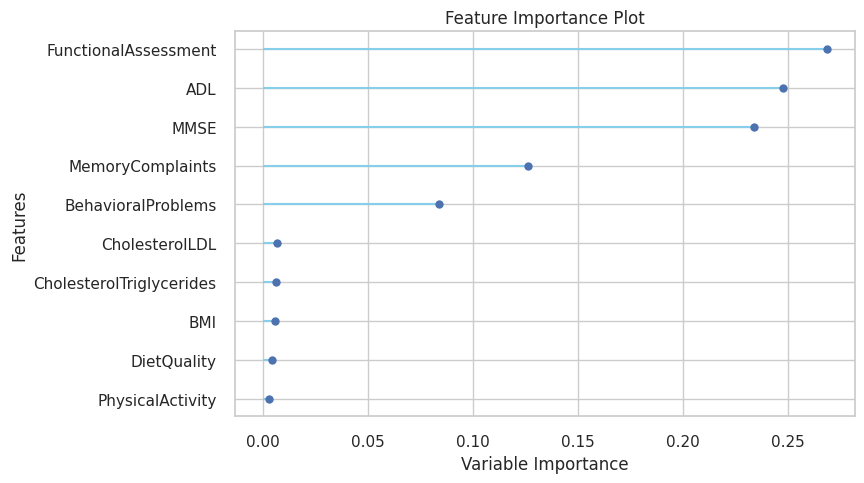

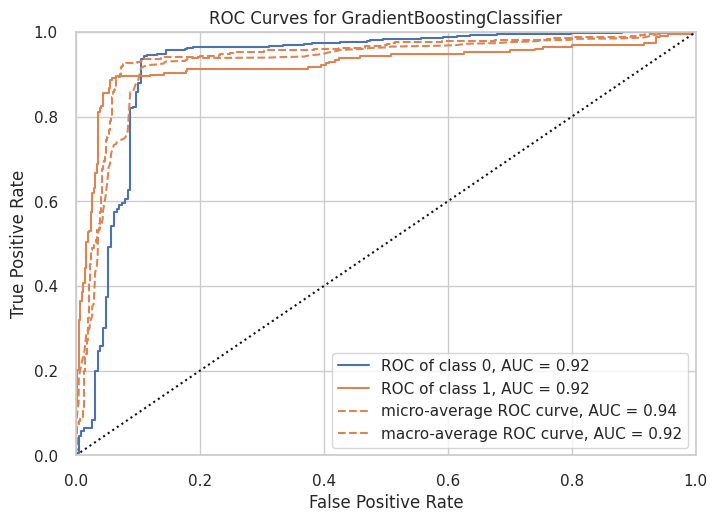

In [ ]:
print("GRADIENT BOOSTING CLASSIFIER")
plot_model(model3, plot="feature")
plot_model(model3, plot="auc")

RANDOM FOREST CLASSIFIER


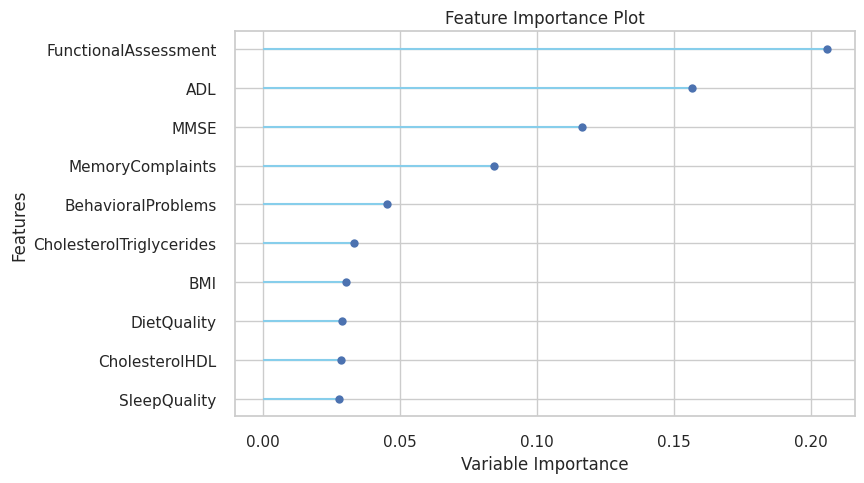

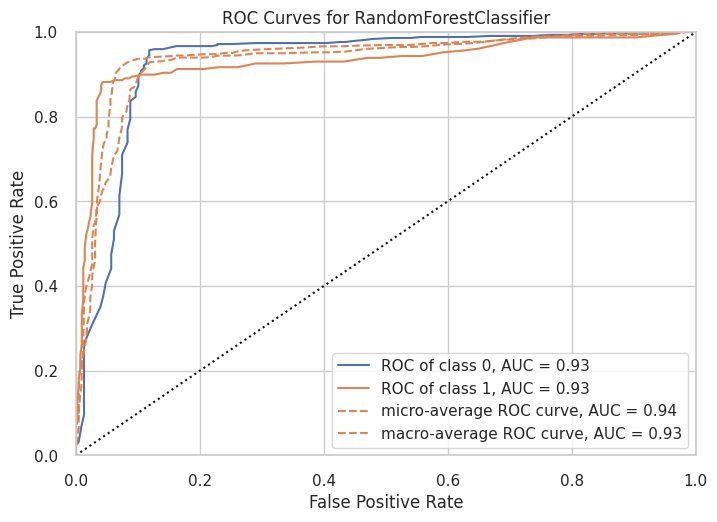

In [ ]:
print("RANDOM FOREST CLASSIFIER")
plot_model(model4, plot="feature")
plot_model(model4, plot="auc")

**FunctionalAssessment** y **ADL** son consistentemente importantes en la mayoría de los modelos, lo que sugiere que tienen un fuerte impacto en la predicción de **Diagnosis**.
**MMSE** también muestra una alta importancia en muchos modelos, indicando su relevancia para la predicción.
Las diferencias en la importancia entre los modelos pueden ser indicativas de cómo cada modelo maneja las características y cómo asigna peso a cada una durante el proceso de entrenamiento.

##Modelo 1

In [ ]:
model1 = XGBClassifier()

In [ ]:
# Convertir las variables categóricas en variables dummy
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Asegurarse de que X_train_encoded y X_test_encoded tengan las mismas columnas
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [ ]:
# Mostrar las columnas de X_train_encoded
print(X_train_encoded.columns)

Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'ADL', 'Gender_1', 'Ethnicity_1', 'Ethnicity_2',
       'Ethnicity_3', 'EducationLevel_1', 'EducationLevel_2',
       'EducationLevel_3', 'Smoking_1', 'FamilyHistoryAlzheimers_1',
       'CardiovascularDisease_1', 'Diabetes_1', 'Depression_1', 'HeadInjury_1',
       'Hypertension_1', 'MemoryComplaints_1', 'BehavioralProblems_1',
       'Confusion_1', 'Disorientation_1', 'PersonalityChanges_1',
       'DifficultyCompletingTasks_1', 'Forgetfulness_1'],
      dtype='object')


In [ ]:
X_train_encoded

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,...,Depression_1,HeadInjury_1,Hypertension_1,MemoryComplaints_1,BehavioralProblems_1,Confusion_1,Disorientation_1,PersonalityChanges_1,DifficultyCompletingTasks_1,Forgetfulness_1
780,86,28.155961,18.629164,6.535593,1.316452,9.620590,139,86,228.038224,53.219277,...,False,False,False,False,False,False,False,False,False,True
1341,62,28.189210,7.763349,1.913491,6.023577,5.039160,176,111,289.375299,176.183778,...,False,False,False,False,False,False,False,False,False,False
820,75,25.391526,8.449637,9.549369,1.774418,7.951681,121,117,226.346614,142.650870,...,True,False,False,False,False,False,False,False,False,False
857,89,23.581751,1.939227,1.322465,8.758693,9.262999,170,71,218.707940,82.859077,...,False,False,False,True,False,False,True,False,False,True
593,76,38.768590,9.013919,8.296794,7.892595,5.928934,118,81,155.850812,115.259386,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,60,31.425226,1.742579,2.689362,3.266146,5.880669,147,86,251.083840,70.633682,...,False,False,False,False,False,False,False,False,False,False
711,60,20.352158,16.789335,3.376786,1.736764,7.633571,123,77,191.215657,108.134459,...,True,False,False,False,False,False,False,True,False,True
199,75,20.623038,5.959683,9.874975,1.484483,9.443387,91,85,221.683553,55.769558,...,False,False,False,False,False,False,False,False,False,False
319,76,33.598266,5.284436,9.476723,2.873511,6.415073,148,101,165.120348,88.539486,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
model1.fit(X_train_encoded, y_train)
y_pred_xgboost = model1.predict(X_test_encoded)

In [ ]:
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f'Accuracy: {accuracy_xgboost:.4f}')

Accuracy: 0.9442


In [ ]:
report_xgboost = classification_report(y_test, y_pred_xgboost)
print('Classification Report:')
print(report_xgboost)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       278
           1       0.93      0.91      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.94      0.94      0.94       430



In [ ]:
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
print('Confusion Matrix:')
print(conf_matrix_xgboost)

Confusion Matrix:
[[268  10]
 [ 14 138]]


##Modelo 2

In [ ]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9512


In [ ]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.95      0.91      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[270   8]
 [ 13 139]]


##Modelo 3

In [ ]:
model3 = GradientBoostingClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9465


In [ ]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       278
           1       0.93      0.92      0.92       152

    accuracy                           0.95       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[267  11]
 [ 12 140]]


##Modelo 4

In [ ]:
model4 = RandomForestClassifier()

In [ ]:
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9419


In [ ]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[269   9]
 [ 16 136]]


#Conclusión

1. XGBoost

*   Puntos Fuertes: Alta precisión (94.42%) y sólido rendimiento en F1-Score (0.92). Bueno para manejar datos desequilibrados.
*   Puntos Débiles: Algo más lento en comparación con otros modelos y podría ser más sensible a la sobreajuste con parámetros no optimizados.

2. LightGBM

*   Puntos Fuertes: Mejor precisión (95.12%) y F1-Score (0.93) entre los modelos. Muy eficiente en términos de tiempo de entrenamiento y rendimiento con grandes volúmenes de datos.
*   Puntos Débiles: Puede ser sensible a la configuración de parámetros y a la calidad de los datos.

3. Gradient Boosting Classifier

*   Puntos Fuertes: Buen rendimiento general con precisión (94.65%) y F1-Score (0.92). Bueno para modelos interpretables y proporciona un equilibrio sólido entre precisión y recall.
*   Puntos Débiles: Más lento que algunos otros modelos en entrenamiento y ajuste, y puede ser menos eficiente en comparación con LightGBM.

4. Random Forest

*   Puntos Fuertes: Sólido rendimiento (94.42% de precisión) con alta capacidad de generalización. Robusto a la sobreajuste y fácil de interpretar.
*   Puntos Débiles: Menor precisión en comparación con LightGBM y Gradient Boosting. Menos eficiente en términos de tiempo para grandes conjuntos de datos.

5. Conclusión

*   Entre los cuatro modelos evaluados, LightGBM sobresale por su precisión y
eficiencia en tiempo de entrenamiento, ofreciendo el mejor rendimiento general. Gradient Boosting Classifier también muestra un desempeño robusto con un equilibrio sólido entre precisión y recall. XGBoost y Random Forest tienen rendimientos similares pero ligeramente inferiores. XGBoost es potente, aunque más lento, mientras que Random Forest es menos eficiente en comparación con los modelos de boosting pero ofrece una buena capacidad de generalización. En general, para un rendimiento óptimo, LightGBM es la mejor opción, pero la selección final puede depender de los requisitos específicos del problema, como la necesidad de interpretabilidad o el tiempo de entrenamiento.








Hacemos la predicción de X_test.

In [ ]:
# Convertir variables categóricas a códigos numéricos
categorical_columns = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
                       'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
                       'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion',
                       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

# Aplicar la conversión
X_train[categorical_columns] = X_train[categorical_columns].apply(lambda col: col.cat.codes)
X_test[categorical_columns] = X_test[categorical_columns].apply(lambda col: col.cat.codes)

# Verificar que las categorías se hayan convertido a numéricas
print(X_train.head())

      Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
780    86       0          2               1  28.155961        0   
1341   62       1          0               3  28.189210        1   
820    75       0          0               0  25.391526        0   
857    89       0          0               0  23.581751        0   
593    76       1          0               2  38.768590        1   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
780            18.629164          6.535593     1.316452      9.620590  ...   
1341            7.763349          1.913491     6.023577      5.039160  ...   
820             8.449637          9.549369     1.774418      7.951681  ...   
857             1.939227          1.322465     8.758693      9.262999  ...   
593             9.013919          8.296794     7.892595      5.928934  ...   

           MMSE  FunctionalAssessment  MemoryComplaints  BehavioralProblems  \
780   20.610337              5.566873      

In [ ]:
# Entrenar el modelo
model2.fit(X_train, y_train)

# Realizar predicciones
predictions = model2.predict(X_test)
print(predictions)

[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
[1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 

In [ ]:
# Guardar el modelo en tu PC local
joblib.dump(model2, 'lightgbm_model.pkl')

['lightgbm_model.pkl']

# Implementación

In [ ]:
descargar = input("¿Quieres descargar el archivo .ipynb? (sí/no): ")

# Respuesta
if descargar.lower() == 'sí' or descargar.lower() == 'si':
    !wget https://raw.githubusercontent.com/MarioHernaiz/TFM-UCM/main/Implementaci%C3%B3n_Alzheimer_Mario_Hernaiz_S%C3%A1nchez.ipynb
    print("Archivo descargado con éxito en local.")
else:
    print("Descarga omitida. Pasando a la siguiente celda.")

¿Quieres descargar el archivo .ipynb? (sí/no): no
Descarga omitida. Pasando a la siguiente celda.


Por si fuera necesario, dejo el link al archivo igualmente.

https://github.com/MarioHernaiz/TFM-UCM/blob/main/Implementaci%C3%B3n_Alzheimer_Mario_Hernaiz_S%C3%A1nchez.ipynb

# Dashboard

In [ ]:
importances = model2.feature_importances_
feature_names = X_train.columns

# Crear DataFrame para visualizar la importancia
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
y_prob = model2.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
corr_matrix_abs = corr_matrix.abs().unstack()

# 3. Eliminar las correlaciones de la diagonal (correlación de una variable consigo misma)
corr_matrix_abs = corr_matrix_abs[corr_matrix_abs != 1.0]

# 4. Filtrar las correlaciones de 'Diagnosis' y ordenar por las correlaciones más fuertes
corr_matrix_abs_filtered = corr_matrix_abs.loc[['Diagnosis' not in index for index in corr_matrix_abs.index]]
top_9_corr = corr_matrix_abs_filtered.sort_values(ascending=False).head(9)

# 5. Crear una lista de variables más correlacionadas e incluir Diagnosis
top_vars = list(set([var for pair in top_9_corr.index for var in pair]))
top_vars.append('Diagnosis')

# 6. Crear una nueva matriz de correlación que incluya las variables más correlacionadas con Diagnosis en la diagonal
top_corr_matrix = corr_matrix.loc[top_vars, top_vars]

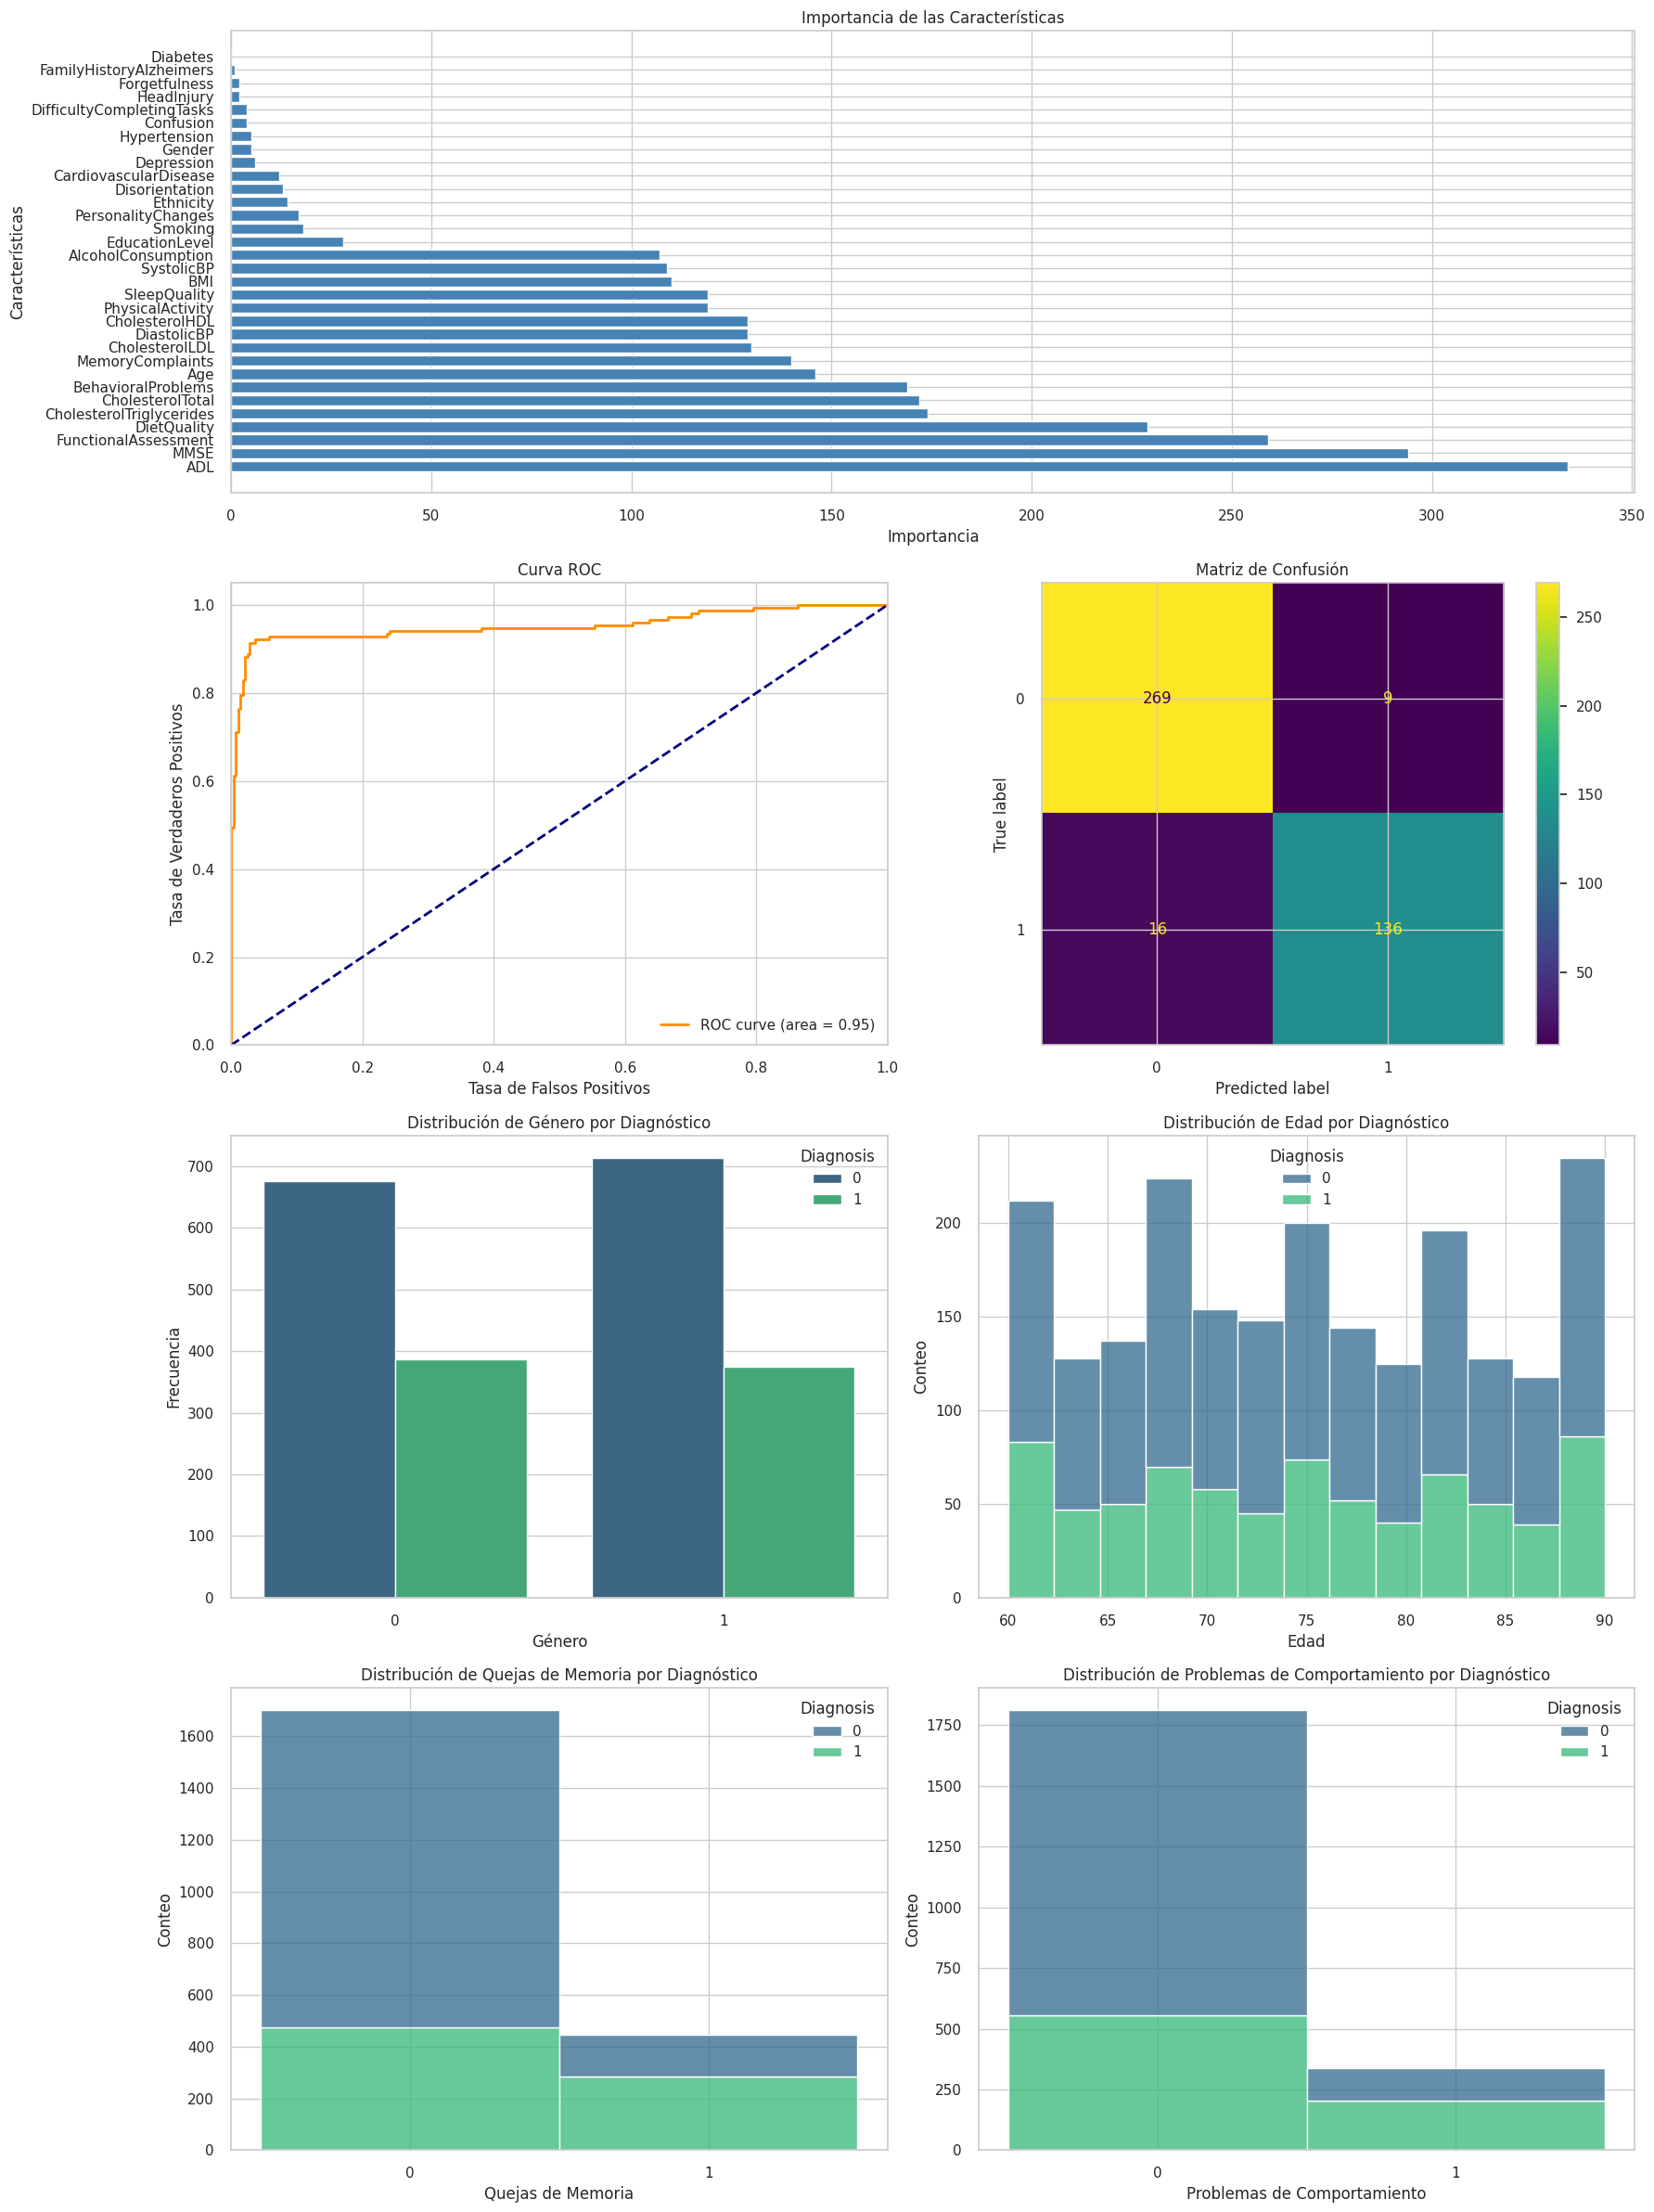

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay

# Asegúrate de definir `fpr`, `tpr`, `roc_auc`, `y_test`, `y_pred`, y `conf_matrix` antes de ejecutar el código.

fig = plt.figure(figsize=(18, 24))

# 1. Importancia de Características (ocupa 0,0 y 0,1)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2)
ax1.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
ax1.set_title('Importancia de las Características')
ax1.set_xlabel('Importancia')
ax1.set_ylabel('Características')

# 2. Curva ROC
ax2 = plt.subplot2grid((4, 2), (1, 0))
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Tasa de Falsos Positivos')
ax2.set_ylabel('Tasa de Verdaderos Positivos')
ax2.set_title('Curva ROC')
ax2.legend(loc='lower right')

# 3. Matriz de Confusión
ax3 = plt.subplot2grid((4, 2), (1, 1))
ConfusionMatrixDisplay(conf_matrix, display_labels=model1.classes_).plot(ax=ax3, cmap='viridis', values_format='d')
ax3.set_title('Matriz de Confusión')

# 4. Distribución por Género y Diagnóstico
ax4 = plt.subplot2grid((4, 2), (2, 0))
sns.countplot(x='Gender', hue='Diagnosis', data=df, palette='viridis', ax=ax4)
ax4.set_title('Distribución de Género por Diagnóstico')
ax4.set_xlabel('Género')
ax4.set_ylabel('Frecuencia')

# 5. Distribución por Edad y Diagnóstico
ax5 = plt.subplot2grid((4, 2), (2, 1))
sns.histplot(data=df, x='Age', hue='Diagnosis', multiple='stack', palette='viridis', ax=ax5)
ax5.set_title('Distribución de Edad por Diagnóstico')
ax5.set_xlabel('Edad')
ax5.set_ylabel('Conteo')

# 6. Distribución por MemoryComplaints y Diagnóstico
ax6 = plt.subplot2grid((4, 2), (3, 0))
sns.histplot(data=df[df['MemoryComplaints'].isin([0, 1])],
             x='MemoryComplaints', hue='Diagnosis', multiple='stack',
             palette='viridis', ax=ax6)
ax6.set_title('Distribución de Quejas de Memoria por Diagnóstico')
ax6.set_xlabel('Quejas de Memoria')
ax6.set_ylabel('Conteo')
ax6.set_xticks([0, 1])
ax6.set_xticklabels(['0', '1'])

# 7. Mapa de Calor en Matriz de Correlación
ax6 = plt.subplot2grid((4, 2), (3, 1))
sns.histplot(data=df[df['BehavioralProblems'].isin([0, 1])],
             x='BehavioralProblems', hue='Diagnosis', multiple='stack',
             palette='viridis', ax=ax6)
ax6.set_title('Distribución de Problemas de Comportamiento por Diagnóstico')
ax6.set_xlabel('Problemas de Comportamiento')
ax6.set_ylabel('Conteo')
ax6.set_xticks([0, 1])
ax6.set_xticklabels(['0', '1'])

plt.tight_layout()
plt.show()